# Data Visualization and Analytics of US Accidents from 2016 to 2021

# Brief Introduction
A data analysis of all the accidents in the United States of America from 2016 to December of 2021


# Table of Contents
   1. **Overview of the Analysis**
   2. **Factors in the Analysis**
   3. **Data Processing**
        <br>3.1 Reading the Dataset
        <br>3.2 Cleaning the Dataset
        <br>3.3 Optimizing the Dataset
        <br>3.4 Converting the DataSet
            to a Faster Format
   4. **Data Visualization**
        <br>4.1 Map Analytics
        <br>4.2 Descriptive Analytics
        <br>4.3 Correlational Analytics
   5. **Summary**

# 1. Overview of the Analytics

# 2. Factors in the Analysis

* Weather conditions
* Wind speed
* Visiblity 
* Precense of precipiation
* Temperature
* Severity

# 3. Data Processing

Below are the pre-requisites for processing the dataset:

#### IMPORTS

In [1]:
# Packages that needs to be installed

#%pip install pandas
#%pip install pyarrow
#%pip install datashader
#%pip install "holoviews[recommended]"
#%pip install hvplot
#%pip install seaborn
#%pip install bokeh
#conda install -c pyviz geoviews

In [2]:
# Imports for data processing
import pandas as pd
import numpy as np
from pyarrow.feather import _feather

In [91]:
# Imports for descriptive analytics and for correlational analytics
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
sns.set_theme(style="whitegrid")
#sns.set_style("whitegrid", {'axes.grid' : False})

In [4]:
# Imports for map analyatics 

import datashader as ds
import holoviews as hv, colorcet as cc
import datashader.transfer_functions as tf
import holoviews.operation.datashader as hd
import hvplot.pandas

from functools import partial
from datashader.colors import Hot
from colorcet import fire
from bokeh.plotting import figure
from bokeh.io import output_notebook, show

from datashader.utils import export_image 
from datashader.utils import lnglat_to_meters as webm
from datashader.colors import colormap_select, Greys9, viridis
from IPython.display import HTML, display

hv.extension('bokeh', 'matplotlib')


### 3.1 Reading the Dataset

In [5]:
#us_accidents_dataset = pd.read_csv("US_Accidents_Dec21_updated.csv")
#us_accidents_dataset.head(100) # Checking the first 100 rows of the dataset

### 3.2 Converting the Dataset to a Faster Format

In [6]:
#us_accidents_dataset.to_parquet("us_accidents_parquet.parq")

### 3.3 Cleaning the Dataset

In [7]:
us_accidents_dataset = pd.read_parquet("us_accidents_parquet.parq")

In [8]:
# Removing columns that has more than 20% null values then removing all rows that has a null value
def clean_data_set(dataset):
    dataset = dataset.dropna(axis='columns', thresh=int(0.80 * len(dataset)))
    #dataset = dataset.dropna(axis='rows')

    return dataset

In [9]:
# The clean data set
us_accidents_dataset_clean = clean_data_set(us_accidents_dataset)
us_accidents_dataset_clean.head()

ID  Severity           Start_Time             End_Time  Start_Lat  \
0  A-1         3  2016-02-08 00:37:08  2016-02-08 06:37:08  40.108910   
1  A-2         2  2016-02-08 05:56:20  2016-02-08 11:56:20  39.865420   
2  A-3         2  2016-02-08 06:15:39  2016-02-08 12:15:39  39.102660   
3  A-4         2  2016-02-08 06:51:45  2016-02-08 12:51:45  41.062130   
4  A-5         3  2016-02-08 07:53:43  2016-02-08 13:53:43  39.172393   

   Start_Lng    End_Lat    End_Lng  Distance(mi)  \
0 -83.092860  40.112060 -83.031870         3.230   
1 -84.062800  39.865010 -84.048730         0.747   
2 -84.524680  39.102090 -84.523960         0.055   
3 -81.537840  41.062170 -81.535470         0.123   
4 -84.492792  39.170476 -84.501798         0.500   

                                         Description  ... Roundabout Station  \
0  Between Sawmill Rd/Exit 20 and OH-315/Olentang...  ...      False   False   
1                 At OH-4/OH-235/Exit 41 - Accident.  ...      False   False   
2                   At I-71/US-50/Exit 1 - Accident.  ...      False   False   
3                    At Dart Ave/Exit 21 - Accident.  ...      False   False   
4                 At Mitchell Ave/Exit 6 - Accident.  ...      False   False   

    Stop Traffic_Calming Traffic_Signal Turning_Loop Sunrise_Sunset  \
0  False           False          False        False          Night   
1  False           False          False        False          Night   
2  False           False          False        False          Night   
3  False           False          False        False          Night   
4  False           False          False        False            Day   

  Civil_Twilight Nautical_Twilight Astronomical_Twilight  
0          Night             Night                 Night  
1          Night             Night                 Night  
2          Night             Night                   Day  
3          Night               Day                   Day  
4            Day               Day                   Day  

[5 rows x 46 columns]

In [10]:
# Printing the columns in the dataset and cherry-picking
print(list(us_accidents_dataset_clean.columns.values))

['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Street', 'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone', 'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight']


We only need the following columns for the data analysis of this dataset:

Details from kaggle: https://www.kaggle.com/datasets/sobhanmoosavi/us-accidents

**Severity** - how severe the accident where in it ranges from 1 to 4 where 1 indicates the least impact on traffic
**End_Lat** - latitude in the gps
**End_Lng** - longitude in the gps
**Side** - side of the highway or street
**City** - address of city
**County** - address of county
**State** - address of the state
**Country** - address country
**Temperature** - temperature that was present (in Fahrenheit)
**Visibility** - visibility at that time (in miles)
**Wind_Speed** - the wind speed in mph
**Precipitation** - amount of rainfall in inches
**Weather_Condition** - condition of wether at that time e.g. rain, thunderstorm, blizzard


In [11]:
# Selecting the columns that we only need
us_accidents_dataset_clean = us_accidents_dataset_clean[['Severity', 'Start_Time', 'End_Lat', 'End_Lng', 'Side', 'City', 'County', 'State', 'Country', 'Temperature(F)', 'Visibility(mi)', 'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition']]
us_accidents_dataset_clean.head()

Severity           Start_Time    End_Lat    End_Lng Side        City  \
0         3  2016-02-08 00:37:08  40.112060 -83.031870    R      Dublin   
1         2  2016-02-08 05:56:20  39.865010 -84.048730    R      Dayton   
2         2  2016-02-08 06:15:39  39.102090 -84.523960    R  Cincinnati   
3         2  2016-02-08 06:51:45  41.062170 -81.535470    R       Akron   
4         3  2016-02-08 07:53:43  39.170476 -84.501798    R  Cincinnati   

       County State Country  Temperature(F)  Visibility(mi)  Wind_Speed(mph)  \
0    Franklin    OH      US            42.1            10.0             10.4   
1  Montgomery    OH      US            36.9            10.0              NaN   
2    Hamilton    OH      US            36.0            10.0              NaN   
3      Summit    OH      US            39.0            10.0              NaN   
4    Hamilton    OH      US            37.0            10.0             10.4   

   Precipitation(in) Weather_Condition  
0               0.00        Light Rain  
1               0.02        Light Rain  
2               0.02          Overcast  
3                NaN          Overcast  
4               0.01        Light Rain

### 3.4 Optimizing the Dataset

In [12]:
us_accidents_dataset_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2845342 entries, 0 to 2845341
Data columns (total 14 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Severity           int64  
 1   Start_Time         object 
 2   End_Lat            float64
 3   End_Lng            float64
 4   Side               object 
 5   City               object 
 6   County             object 
 7   State              object 
 8   Country            object 
 9   Temperature(F)     float64
 10  Visibility(mi)     float64
 11  Wind_Speed(mph)    float64
 12  Precipitation(in)  float64
 13  Weather_Condition  object 
dtypes: float64(6), int64(1), object(7)
memory usage: 303.9+ MB


In [13]:
# Down casting int values
us_accidents_dataset_clean['Severity'] = us_accidents_dataset_clean['Severity'].astype('int8')
us_accidents_dataset_clean['End_Lat'] = us_accidents_dataset_clean['End_Lat'].astype('float32')
us_accidents_dataset_clean['End_Lng'] = us_accidents_dataset_clean['End_Lng'].astype('float32')
us_accidents_dataset_clean['Temperature(F)'] = us_accidents_dataset_clean['Temperature(F)'].astype('float32')
us_accidents_dataset_clean['Visibility(mi)'] = us_accidents_dataset_clean['Visibility(mi)'].astype('float32')
us_accidents_dataset_clean['Wind_Speed(mph)'] = us_accidents_dataset_clean['Wind_Speed(mph)'].astype('float32')
us_accidents_dataset_clean['Precipitation(in)'] = us_accidents_dataset_clean['Precipitation(in)'].astype('float32')

In [14]:
# Rounding off latitude and longitude values
us_accidents_dataset_clean['End_Lat'].apply(lambda x: '%.2f' % x)
us_accidents_dataset_clean['End_Lng'].apply(lambda x: '%.2f' % x)

0           -83.03
1           -84.05
2           -84.52
3           -81.54
4           -84.50
            ...   
2845337    -117.37
2845338    -117.15
2845339    -117.86
2845340    -118.40
2845341    -117.24
Name: End_Lng, Length: 2845342, dtype: object

In [15]:
# Converting latitude and longtitude values to the web mercator fomrmat

us_accidents_dataset_clean.loc[:, 'Easting'], us_accidents_dataset_clean.loc[:, 'Northing'] = webm(us_accidents_dataset_clean['End_Lng'], us_accidents_dataset_clean['End_Lat'])

# Rounding off to decimal places to remvoe scientific notation
us_accidents_dataset_clean['Easting'].apply(lambda x: '%.2f' % x)
us_accidents_dataset_clean['Northing'].apply(lambda x: '%.2f' % x)

# Converting back to float
us_accidents_dataset_clean['Easting'] = us_accidents_dataset_clean['Easting'].astype('float32')
us_accidents_dataset_clean['Northing'] = us_accidents_dataset_clean['Northing'].astype('float32')

#us_accidents_dataset_clean =  us_accidents_dataset_clean.loc[:, ['End_Lng', 'Easting']]

In [16]:
us_accidents_dataset_clean.head()

Severity           Start_Time    End_Lat    End_Lng Side        City  \
0         3  2016-02-08 00:37:08  40.112061 -83.031868    R      Dublin   
1         2  2016-02-08 05:56:20  39.865009 -84.048729    R      Dayton   
2         2  2016-02-08 06:15:39  39.102089 -84.523956    R  Cincinnati   
3         2  2016-02-08 06:51:45  41.062168 -81.535469    R       Akron   
4         3  2016-02-08 07:53:43  39.170475 -84.501801    R  Cincinnati   

       County State Country  Temperature(F)  Visibility(mi)  Wind_Speed(mph)  \
0    Franklin    OH      US       42.099998            10.0             10.4   
1  Montgomery    OH      US       36.900002            10.0              NaN   
2    Hamilton    OH      US       36.000000            10.0              NaN   
3      Summit    OH      US       39.000000            10.0              NaN   
4    Hamilton    OH      US       37.000000            10.0             10.4   

   Precipitation(in) Weather_Condition    Easting   Northing  
0               0.00        Light Rain -9243065.0  4882239.0  
1               0.02        Light Rain -9356262.0  4846345.0  
2               0.02          Overcast -9409163.0  4736303.5  
3                NaN          Overcast -9076486.0  5021517.0  
4               0.01        Light Rain -9406697.0  4746120.0

In [17]:
# Optimizing the date and time
us_accidents_dataset_clean['Start_Time'] = pd.to_datetime(us_accidents_dataset_clean['Start_Time'])
us_accidents_dataset_clean['Year'], us_accidents_dataset_clean['Month'] = us_accidents_dataset_clean['Start_Time'].dt.year, us_accidents_dataset_clean['Start_Time'].dt.month
us_accidents_dataset_clean['Date'] = us_accidents_dataset_clean['Start_Time'].dt.normalize()

In [18]:
us_accidents_dataset_clean.head()

Severity          Start_Time    End_Lat    End_Lng Side        City  \
0         3 2016-02-08 00:37:08  40.112061 -83.031868    R      Dublin   
1         2 2016-02-08 05:56:20  39.865009 -84.048729    R      Dayton   
2         2 2016-02-08 06:15:39  39.102089 -84.523956    R  Cincinnati   
3         2 2016-02-08 06:51:45  41.062168 -81.535469    R       Akron   
4         3 2016-02-08 07:53:43  39.170475 -84.501801    R  Cincinnati   

       County State Country  Temperature(F)  Visibility(mi)  Wind_Speed(mph)  \
0    Franklin    OH      US       42.099998            10.0             10.4   
1  Montgomery    OH      US       36.900002            10.0              NaN   
2    Hamilton    OH      US       36.000000            10.0              NaN   
3      Summit    OH      US       39.000000            10.0              NaN   
4    Hamilton    OH      US       37.000000            10.0             10.4   

   Precipitation(in) Weather_Condition    Easting   Northing  Year  Month  \
0               0.00        Light Rain -9243065.0  4882239.0  2016      2   
1               0.02        Light Rain -9356262.0  4846345.0  2016      2   
2               0.02          Overcast -9409163.0  4736303.5  2016      2   
3                NaN          Overcast -9076486.0  5021517.0  2016      2   
4               0.01        Light Rain -9406697.0  4746120.0  2016      2   

        Date  
0 2016-02-08  
1 2016-02-08  
2 2016-02-08  
3 2016-02-08  
4 2016-02-08

In [19]:
# Write again to parquet
us_accidents_dataset_clean.to_parquet("us_accidents_final.parq")

# 4. Data Visualization

## 4.1 Descriptive Analytics

> ### HELPER FUNCTIONS

In [20]:
# HELPER FUNCTIONS
from typing import overload

def group_aggregate(dataset, group_by_column, agg_columns: dict):
    """_summary_

    Args:
        dataset (_type_): _description_
        group_by_column (_type_): _description_
        agg_columns (dict): _description_

    Returns:
        _type_: _description_
    """
    
    dataset = dataset.copy()
    aggregated_dataset = dataset.groupby([group_by_column]).agg(agg_columns).reset_index()
    
    return aggregated_dataset


def get_n_rows_sorted(dataset, n_rows, column):
    """_summary_

    Args:
        dataset (_type_): _description_
        n_rows (_type_): _description_
        column (_type_): _description_

    Returns:
        _type_: _description_
    """

    return dataset.nlargest(n_rows, column, keep='last')

def round_off(dataset, column, sig_figures):
    """_summary_

    Args:
        dataset (_type_): _description_
        column (_type_): _description_
        sig_figures (_type_): _description_

    Returns:
        _type_: _description_
    """

    return dataset.round({column: sig_figures})

def plot_hist(dataset, x_range, y_range, legend, color):
    """_summary_

    Args:
        dataset (_type_): _description_
        x_range (_type_): _description_
        y_range (_type_): _description_
        legend (_type_): _description_
        color (_type_): _description_
    """

    fig = sns.histplot(dataset, x=x_range, hue=legend, weights=y_range, multiple='stack', palette=color)
    fig.set_ylabel(y_range)
    legend = fig.get_legend()
    legend.set_bbox_to_anchor((1, 1))

def plot_barplot(dataset, x_range, y_range, order, color, orient):
    sns.barplot(data=dataset, x=x_range, y=y_range, order=dataset[order], palette=color, orient=orient)    

def plot_lineplot(dataset):
    sns.lineplot(data=dataset)


In [21]:
# Addes the accidents for each state then puts on a new column called Total_Accidents
us_accidents_total = us_accidents_dataset_clean.copy()
us_accidents_total["Total_Accidents"] = us_accidents_total["State"].map(us_accidents_total["State"].value_counts())
us_accidents_total.head()

Severity          Start_Time    End_Lat    End_Lng Side        City  \
0         3 2016-02-08 00:37:08  40.112061 -83.031868    R      Dublin   
1         2 2016-02-08 05:56:20  39.865009 -84.048729    R      Dayton   
2         2 2016-02-08 06:15:39  39.102089 -84.523956    R  Cincinnati   
3         2 2016-02-08 06:51:45  41.062168 -81.535469    R       Akron   
4         3 2016-02-08 07:53:43  39.170475 -84.501801    R  Cincinnati   

       County State Country  Temperature(F)  Visibility(mi)  Wind_Speed(mph)  \
0    Franklin    OH      US       42.099998            10.0             10.4   
1  Montgomery    OH      US       36.900002            10.0              NaN   
2    Hamilton    OH      US       36.000000            10.0              NaN   
3      Summit    OH      US       39.000000            10.0              NaN   
4    Hamilton    OH      US       37.000000            10.0             10.4   

   Precipitation(in) Weather_Condition    Easting   Northing  Year  Month  \
0               0.00        Light Rain -9243065.0  4882239.0  2016      2   
1               0.02        Light Rain -9356262.0  4846345.0  2016      2   
2               0.02          Overcast -9409163.0  4736303.5  2016      2   
3                NaN          Overcast -9076486.0  5021517.0  2016      2   
4               0.01        Light Rain -9406697.0  4746120.0  2016      2   

        Date  Total_Accidents  
0 2016-02-08            24409  
1 2016-02-08            24409  
2 2016-02-08            24409  
3 2016-02-08            24409  
4 2016-02-08            24409

### 4.1a All 50 states and their total accidents over time

In [22]:
# Copies the us_accidents_total data set into a new variable called us_accidents_timespan
us_accidents_timespan = us_accidents_total.copy()        

Text(0.5, 1.0, 'Total Accidents Per Year in the US From 2016 to 2021')

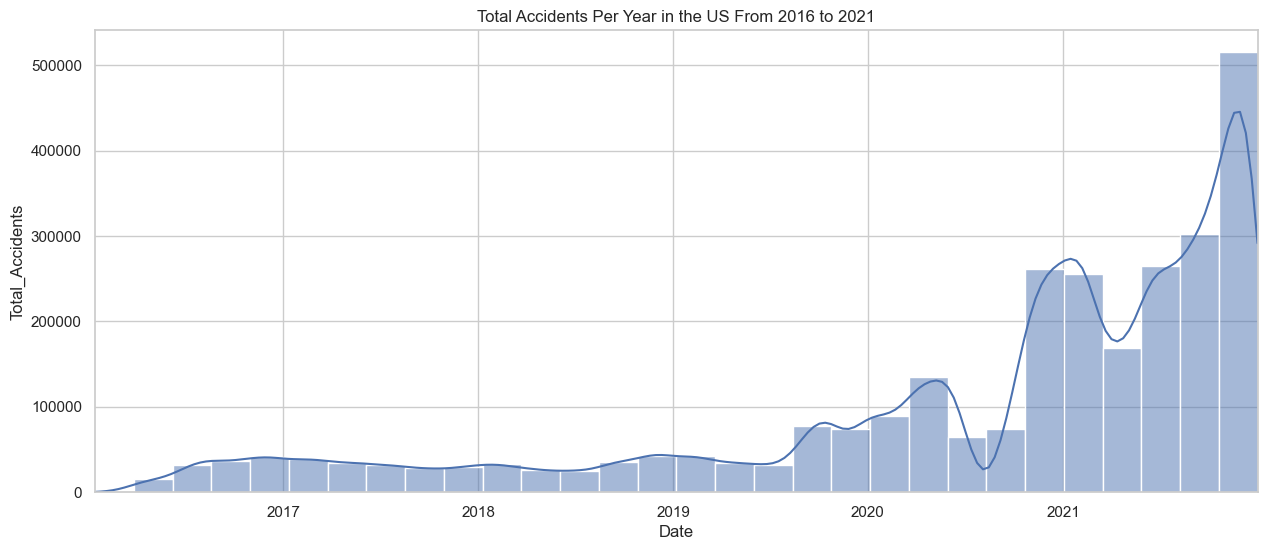

In [92]:
f, ax = plt.subplots(figsize=(15, 6))
plt.ticklabel_format(style='plain', axis='y')

fig = sns.histplot(data=us_accidents_timespan, x='Date', bins=30, kde=True)
fig.set_xlim(us_accidents_timespan['Date'].min(), us_accidents_timespan['Date'].max())
fig.set_ylabel("Total_Accidents")

plt.title("Total Accidents Per Year in the US From 2016 to 2021")

> Given above, we can say that 2021 was a spike in the total accidents per year. But upon observing we can see that the around the middle of 2020, accidents dropped by a quiet a lot actually as 2020 was the time of lockdowns and quaratines due to the Covid-19 pandemic. 2016 to 2019 was ranging betwen a few thousands to tens of thounsands but 2021 was a huge spike as that is the time that US started to loosen the lockdowns in their country.

### 4.1b Top 15 States and Their Total Accidents by Severity

In [24]:
# The aggregrated top 15 states and their total accidents and the severity for each state

us_accidents_top15 = group_aggregate(dataset=us_accidents_total, group_by_column='State', agg_columns={'Total_Accidents':'count', 'Severity':'mean'})
us_accidents_top15 = get_n_rows_sorted(dataset=us_accidents_top15, n_rows=15, column='Total_Accidents')
us_accidents_top15 = round_off(dataset=us_accidents_top15, column='Severity', sig_figures=1)
us_accidents_top15.info()
us_accidents_top15.head(15)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15 entries, 3 to 42
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   State            15 non-null     object 
 1   Total_Accidents  15 non-null     int64  
 2   Severity         15 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 480.0+ bytes


State  Total_Accidents  Severity
3     CA           795868       2.0
8     FL           401388       2.1
41    TX           149037       2.2
35    OR           126341       2.1
43    VA           113535       2.2
32    NY           108049       2.2
36    PA            99975       2.2
21    MN            97185       2.0
25    NC            91362       2.1
38    SC            89216       2.1
18    MD            65085       2.3
2     AZ            56504       2.1
29    NJ            52902       2.2
40    TN            52613       2.1
42    UT            49193       2.1

Text(0.5, 1.0, 'Top 15 States and Their Total Accidents by Severity')

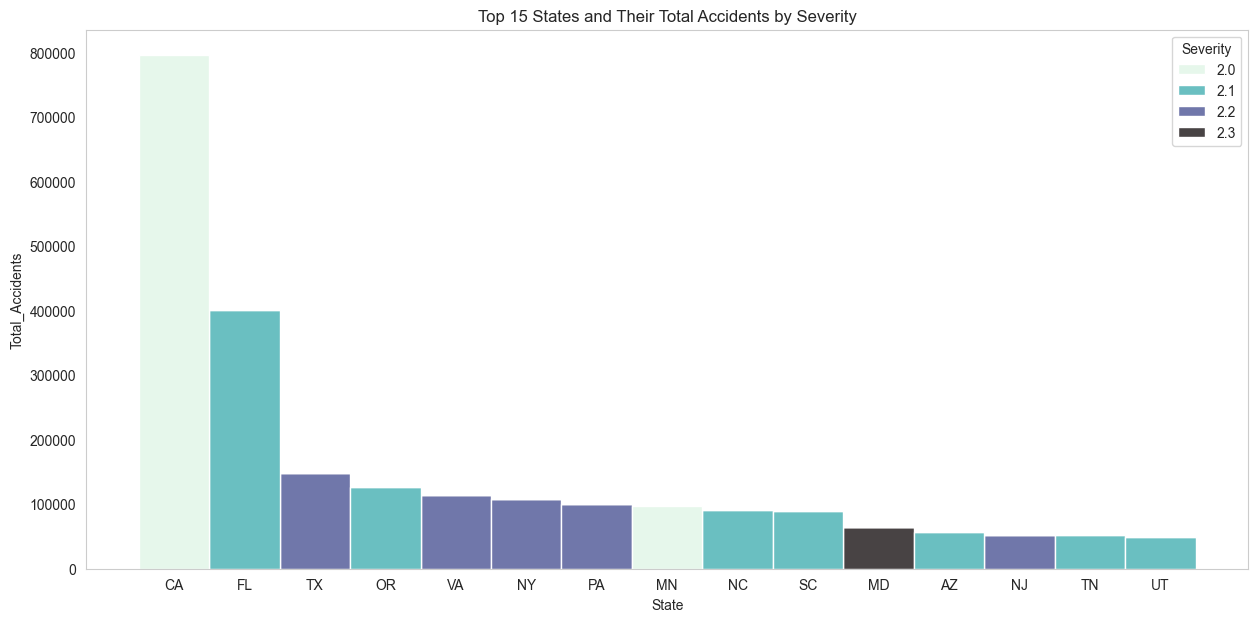

In [89]:
# Plot the top 15 states and their total accidents by severity
f, ax = plt.subplots(figsize=(15, 7))

#plot_barplot(dataset=us_accidents_top15, x_range='Total_Accidents', y_range='State', order='State', color='mako', orient='h', hue='Severity')
plot_hist(dataset=us_accidents_top15, x_range='State', y_range='Total_Accidents', legend='Severity', color='mako_r')


plt.title("Top 15 States and Their Total Accidents by Severity")

In [26]:
# Shows the top 15 states with the most accidents
us_accidents_top15.head(15)

State  Total_Accidents  Severity
3     CA           795868       2.0
8     FL           401388       2.1
41    TX           149037       2.2
35    OR           126341       2.1
43    VA           113535       2.2
32    NY           108049       2.2
36    PA            99975       2.2
21    MN            97185       2.0
25    NC            91362       2.1
38    SC            89216       2.1
18    MD            65085       2.3
2     AZ            56504       2.1
29    NJ            52902       2.2
40    TN            52613       2.1
42    UT            49193       2.1

> We can see here the state with the most accidents is California while New Jersey being with the least amount. Although the accidents of California may be expontial but its severity is actually reasonable at 2.0 while the least state with accidents actually has the most severe severity of 2.2 while other states average from 2.0 to 2.1.

### 4.1c Total Accidents by Weather

In [27]:
# Grouping the accidents by weather then aggregrating the total accidents and the mean of the total severity count
us_accidents_top15_weather = us_accidents_total.copy()
us_accidents_top15_weather = group_aggregate(dataset=us_accidents_top15_weather, group_by_column='Weather_Condition', agg_columns={'Total_Accidents':'count', 'Severity':'mean'})
us_accidents_top15_weather = get_n_rows_sorted(dataset=us_accidents_top15_weather, n_rows=15, column='Total_Accidents')
us_accidents_top15_weather = round_off(dataset=us_accidents_top15_weather, column='Severity', sig_figures=1)
us_accidents_top15_weather.head()

Weather_Condition  Total_Accidents  Severity
15              Fair          1107194       2.1
76     Mostly Cloudy           363959       2.1
7             Cloudy           348767       2.1
81     Partly Cloudy           249939       2.1
6              Clear           173823       2.5

Text(0.5, 1.0, 'Top 15 Weather Conditions and Their Total Accidents')

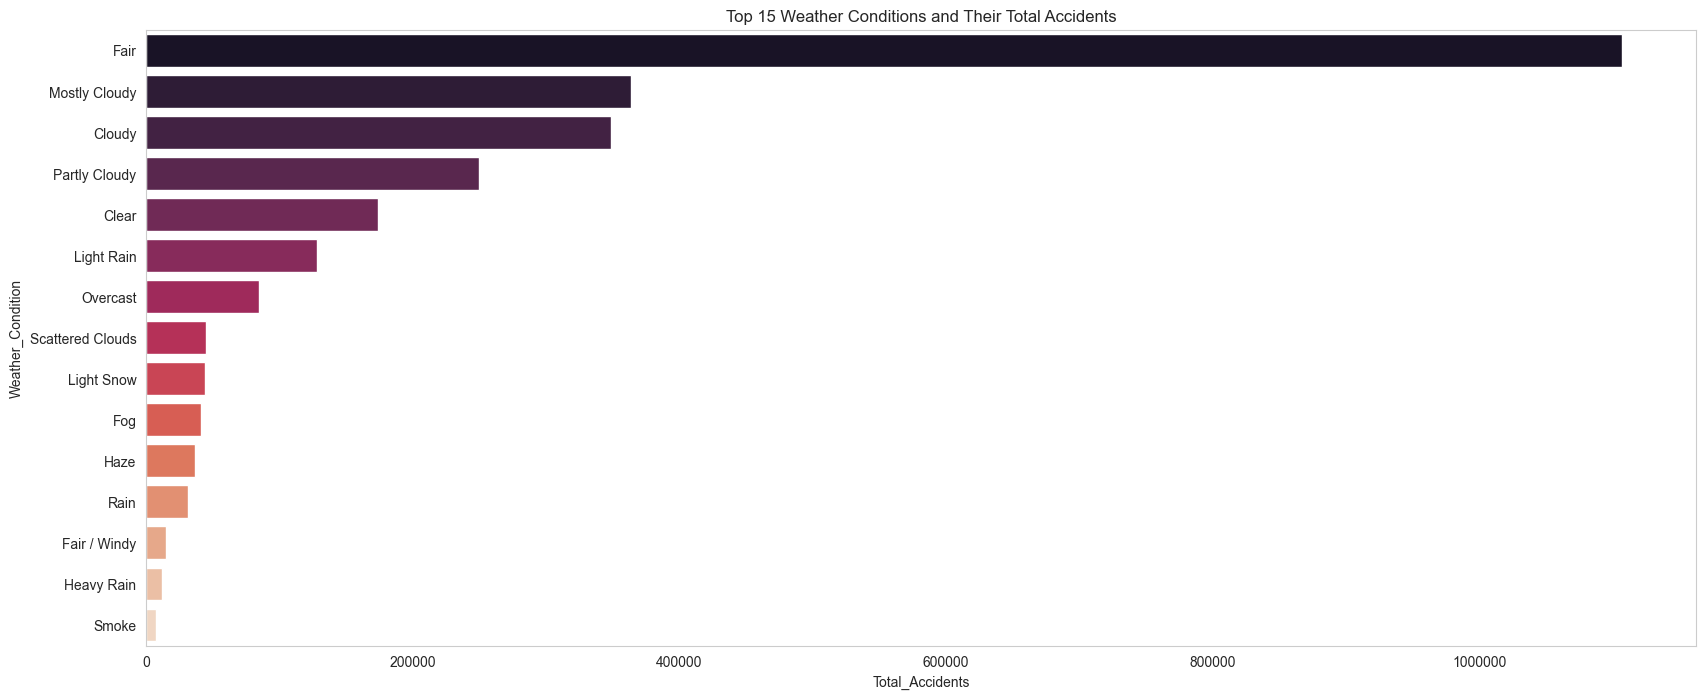

In [87]:

# Creating the top 15 weather conditions and ther total accidents by severity

f, ax = plt.subplots(figsize=(20, 8))


plt.ticklabel_format(style='plain', axis='x')

plot_barplot(dataset=us_accidents_top15_weather, x_range='Total_Accidents', y_range='Weather_Condition', order='Weather_Condition', color='rocket', orient='h')

plt.title("Top 15 Weather Conditions and Their Total Accidents")


> Upon observing, we can see that 'Fair' weather or generally can be observed as generally average weather condition has the most accidents occur on it while 'Mostly Cloudly / Windy' has the least amount of accidents. While Light snow has the most severe effects with serverity level of 2.2 But surprisingly 'Haze' actually has the least severity level 2.0 given its effects.

 ### 4.1d Total accidents by temperature

In [29]:
# Gets the quartiles of the temperatures
us_accidents_temps = us_accidents_total.copy()
us_accidents_temps = us_accidents_temps['Temperature(F)'].quantile([.25, .5, .75]).rename_axis('Quartiles').reset_index(name='Temperature(F)')

# 0.25 = 25%
# 0.50 = 50%
# 0.75 = 75%

Text(0.5, 1.0, 'Temperatures and Their Percentages in the Total Accidents')

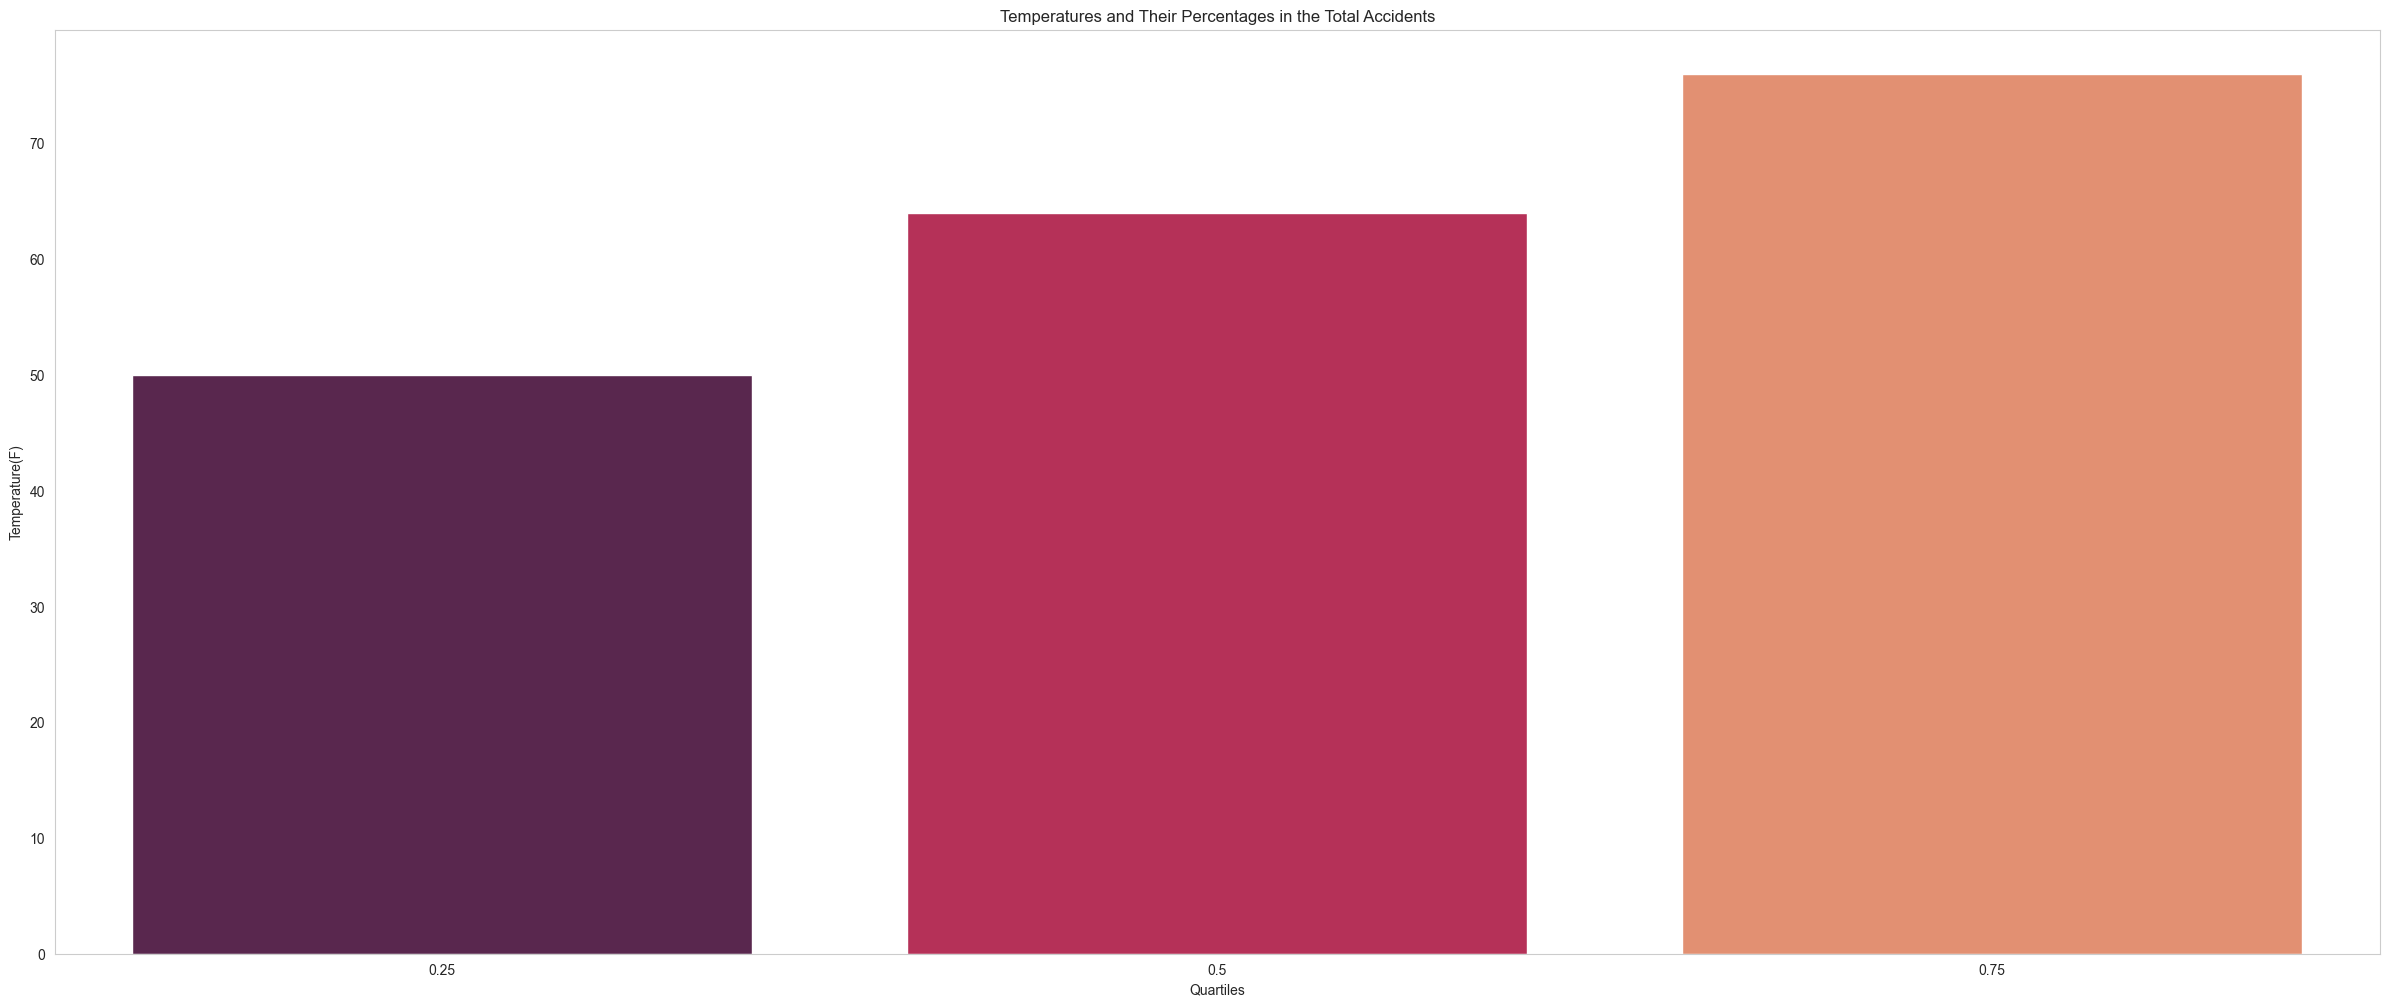

In [90]:

# Creating the top 15 temperature levels and their total accidents 

f, ax = plt.subplots(figsize=(30, 12))
plt.ticklabel_format(style='plain', axis='y')

plot_barplot(dataset=us_accidents_temps, x_range='Quartiles', y_range='Temperature(F)', order='Quartiles', color='rocket', orient='v')

plt.title("Temperatures and Their Percentages in the Total Accidents")

In [31]:
# Gets the quartiles and values of the temperatures
us_accidents_temps.head()

Quartiles  Temperature(F)
0       0.25            50.0
1       0.50            64.0
2       0.75            76.0

> Given the bar plot above, we can dictate that 75% of the total accidents occured on a temperature of 76 farenheit while 50% occur 64 farehenheit and with most least occuring on is 50 farehneit. 76 farehnheit can be obsevered as 'fair' weather which we can cross-check from the bar plot from 4.b which they have the same theory that most of the accidents occur on a fair weather. While a quarter of the accidents occur on rather 'cold' conditions as which can be felt at in the range of 50 farenheit.

## 4.2 Map Analytics

This section will focus on the aggregated accidents account of all states and heatmaps

### 4.2a Choropleth Map of the US Total Accidents by State

In [32]:
# Imports for the choropleth map specifically 

from bokeh.models import LogColorMapper, ColorBar
from bokeh.palettes import Oranges256 as oranges
from bokeh.sampledata.us_states import data as us_states

In [33]:
# Setting contstants for the plots
PLOT_WIDTH = 900
PLOT_HEIGHT = 600
LINE_COLOR = "white"
LINE_WIDTH = 0.5

In [34]:
# Prepation of the aggregated dataset 

us_accidents_per_state = us_accidents_total.copy()
us_accidents_per_state = group_aggregate(dataset=us_accidents_per_state, group_by_column='State', agg_columns={'Total_Accidents':'count'})

In [35]:
# Converting the us_states to a dataframe as and getting the longtitude and latitude values

us_states_total = pd.DataFrame(us_states).T
us_states_total = us_states_total[~us_states_total["name"].isin(['Alaska', "Hawaii"])]
us_states_total["lons"] = us_states_total.lons.values.tolist()
us_states_total["lats"] = us_states_total.lats.values.tolist()
us_states_total = us_states_total.reset_index()
us_states_total.head()

index       name     region  \
0    NV     Nevada  Southwest   
1    AZ    Arizona  Southwest   
2    WI  Wisconsin    Central   
3    GA    Georgia  Southeast   
4    KS     Kansas    Central   

                                                lats  \
0  [40.68928, 40.4958, 40.30302, 40.09896, 39.999...   
1  [34.87057, 35.00186, 35.00332, 35.07971, 35.11...   
2  [42.49273, 42.49433, 42.49562, 42.49561, 42.49...   
3  [32.29667, 32.24425, 32.09197, 32.03256, 32.02...   
4  [36.99927, 36.99879, 36.99914, 36.99903, 36.99...   

                                                lons  
0  [-114.04392, -114.04558, -114.04619, -114.0464...  
1  [-114.63332, -114.63349, -114.63423, -114.6089...  
2  [-87.8156, -87.93137, -88.10268, -88.20645, -8...  
3  [-81.12387, -81.15654, -81.02071, -80.75203, -...  
4  [-96.28415, -96.55381, -96.91244, -97.1197, -9...

In [36]:
# Merging the US boundary dataframe and the aggregrated US accidents per state
us_states_total = us_states_total.merge(us_accidents_per_state[['State','Total_Accidents']], how='left', left_on='index', right_on='State')
us_states_total.head()

index       name     region  \
0    NV     Nevada  Southwest   
1    AZ    Arizona  Southwest   
2    WI  Wisconsin    Central   
3    GA    Georgia  Southeast   
4    KS     Kansas    Central   

                                                lats  \
0  [40.68928, 40.4958, 40.30302, 40.09896, 39.999...   
1  [34.87057, 35.00186, 35.00332, 35.07971, 35.11...   
2  [42.49273, 42.49433, 42.49562, 42.49561, 42.49...   
3  [32.29667, 32.24425, 32.09197, 32.03256, 32.02...   
4  [36.99927, 36.99879, 36.99914, 36.99903, 36.99...   

                                                lons State  Total_Accidents  
0  [-114.04392, -114.04558, -114.04619, -114.0464...    NV             6197  
1  [-114.63332, -114.63349, -114.63423, -114.6089...    AZ            56504  
2  [-87.8156, -87.93137, -88.10268, -88.20645, -8...    WI             7896  
3  [-81.12387, -81.15654, -81.02071, -80.75203, -...    GA            40086  
4  [-96.28415, -96.55381, -96.91244, -97.1197, -9...    KS             9033

In [37]:
# Puts the list values of the dataset into a dictionary

us_accidents_choropleth = {}
us_accidents_choropleth['lons'] = us_states_total.lons.values.tolist()
us_accidents_choropleth['lats'] = us_states_total.lats.values.tolist()
us_accidents_choropleth["name"] = us_states_total.name.values.tolist()
us_accidents_choropleth["StateCodes"] = us_states_total.index.values.tolist()
us_accidents_choropleth['TotalAccidents'] = us_states_total.Total_Accidents.values.tolist()

In [38]:
# Plotting the merged dataframe
fig = figure(plot_width=PLOT_WIDTH, plot_height=PLOT_HEIGHT, title="US Accidents Per State Choropleth Map",
            x_axis_location=None, y_axis_location=None,
            tooltips=[("State","@name"), ("TotalAccidents", "@TotalAccidents"), ("(Long, Lat)", "($x, $y)")]
            )

fig.grid.grid_line_color = None

#color_mapper = LogColorMapper(palette=oranges[::-1])
color_mapper = LogColorMapper(palette=oranges[::-1], low=us_accidents_total['Total_Accidents'].min(), high=us_accidents_total['Total_Accidents'].max())

color_bar = ColorBar(color_mapper=color_mapper)

fig.patches("lons", "lats", source=us_accidents_choropleth,
            fill_color={'field': 'TotalAccidents', 'transform': color_mapper},
            fill_alpha=0.7, line_color=LINE_COLOR, line_width=LINE_WIDTH)

fig.add_layout(color_bar, "right")

show(fig)


### 4.2b The Heatmap of US Accidents From 2016 to 2021

In [39]:
map_total_accidents = pd.read_parquet('us_accidents_final.parq', columns=['Easting', 'Northing'])
len(map_total_accidents)
map_total_accidents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2845342 entries, 0 to 2845341
Data columns (total 2 columns):
 #   Column    Dtype  
---  ------    -----  
 0   Easting   float32
 1   Northing  float32
dtypes: float32(2)
memory usage: 21.7 MB


In [40]:
# Setting the width and height of the heatmap
plot_width  = int(3840)
plot_height = int(2160)

In [41]:
# Setting the boundaries of the of the heatmap which is the entire US

USA = ((-124.72,  -66.95), (23.55, 50.06))

#x_range ,y_range = [list(r) for r in webm(*USA)]

In [42]:
# Setting the heatmap colormaps and background

background = "black"

export = partial(export_image, background=background, export_path="export")
cm = partial(colormap_select, reverse=(background!="black"))

display(HTML("<style>.container  { width:100% !important; }</style>"))

In [43]:
def render_heatmap(dataset, x_range, y_range, file_name, location = None):
    """This function is created to reduce code duplication and to also take in 
       arguments in one line. The main goal of this function to render a heatmap
       the chosen dataset with the following paramters:

    Args:
        dataset (dataframe): dataset or dataframe
        x_range (float): x_axis in the mercator format
        y_range (float): y_axis in the mercator format
        location (tuple): the boundaries of the location

    Returns:
        _image_: returns a render of the heatmap and exports it locally in a 'export' folder
    """

    if location is not None:
        cvs = ds.Canvas(plot_width, plot_height, *webm(*location))
    elif location is None:
        cvs = ds.Canvas(plot_width, plot_height)  

    #if location_is_mercator is True:
       #cvs = ds.Canvas(plot_width, plot_height, *location)
   # else:
        #cvs = ds.Canvas(plot_width, plot_height, *webm(*location))
        
    agg = cvs.points(dataset, x_range, y_range)

    # Optional if you want to export it as an image
    
    #export(tf.shade(agg, cmap='lightblue', how='eq_hist'), "us_accidents_heatmap")
    return export(tf.shade(agg, cmap=cm(fire), how='eq_hist'), file_name)

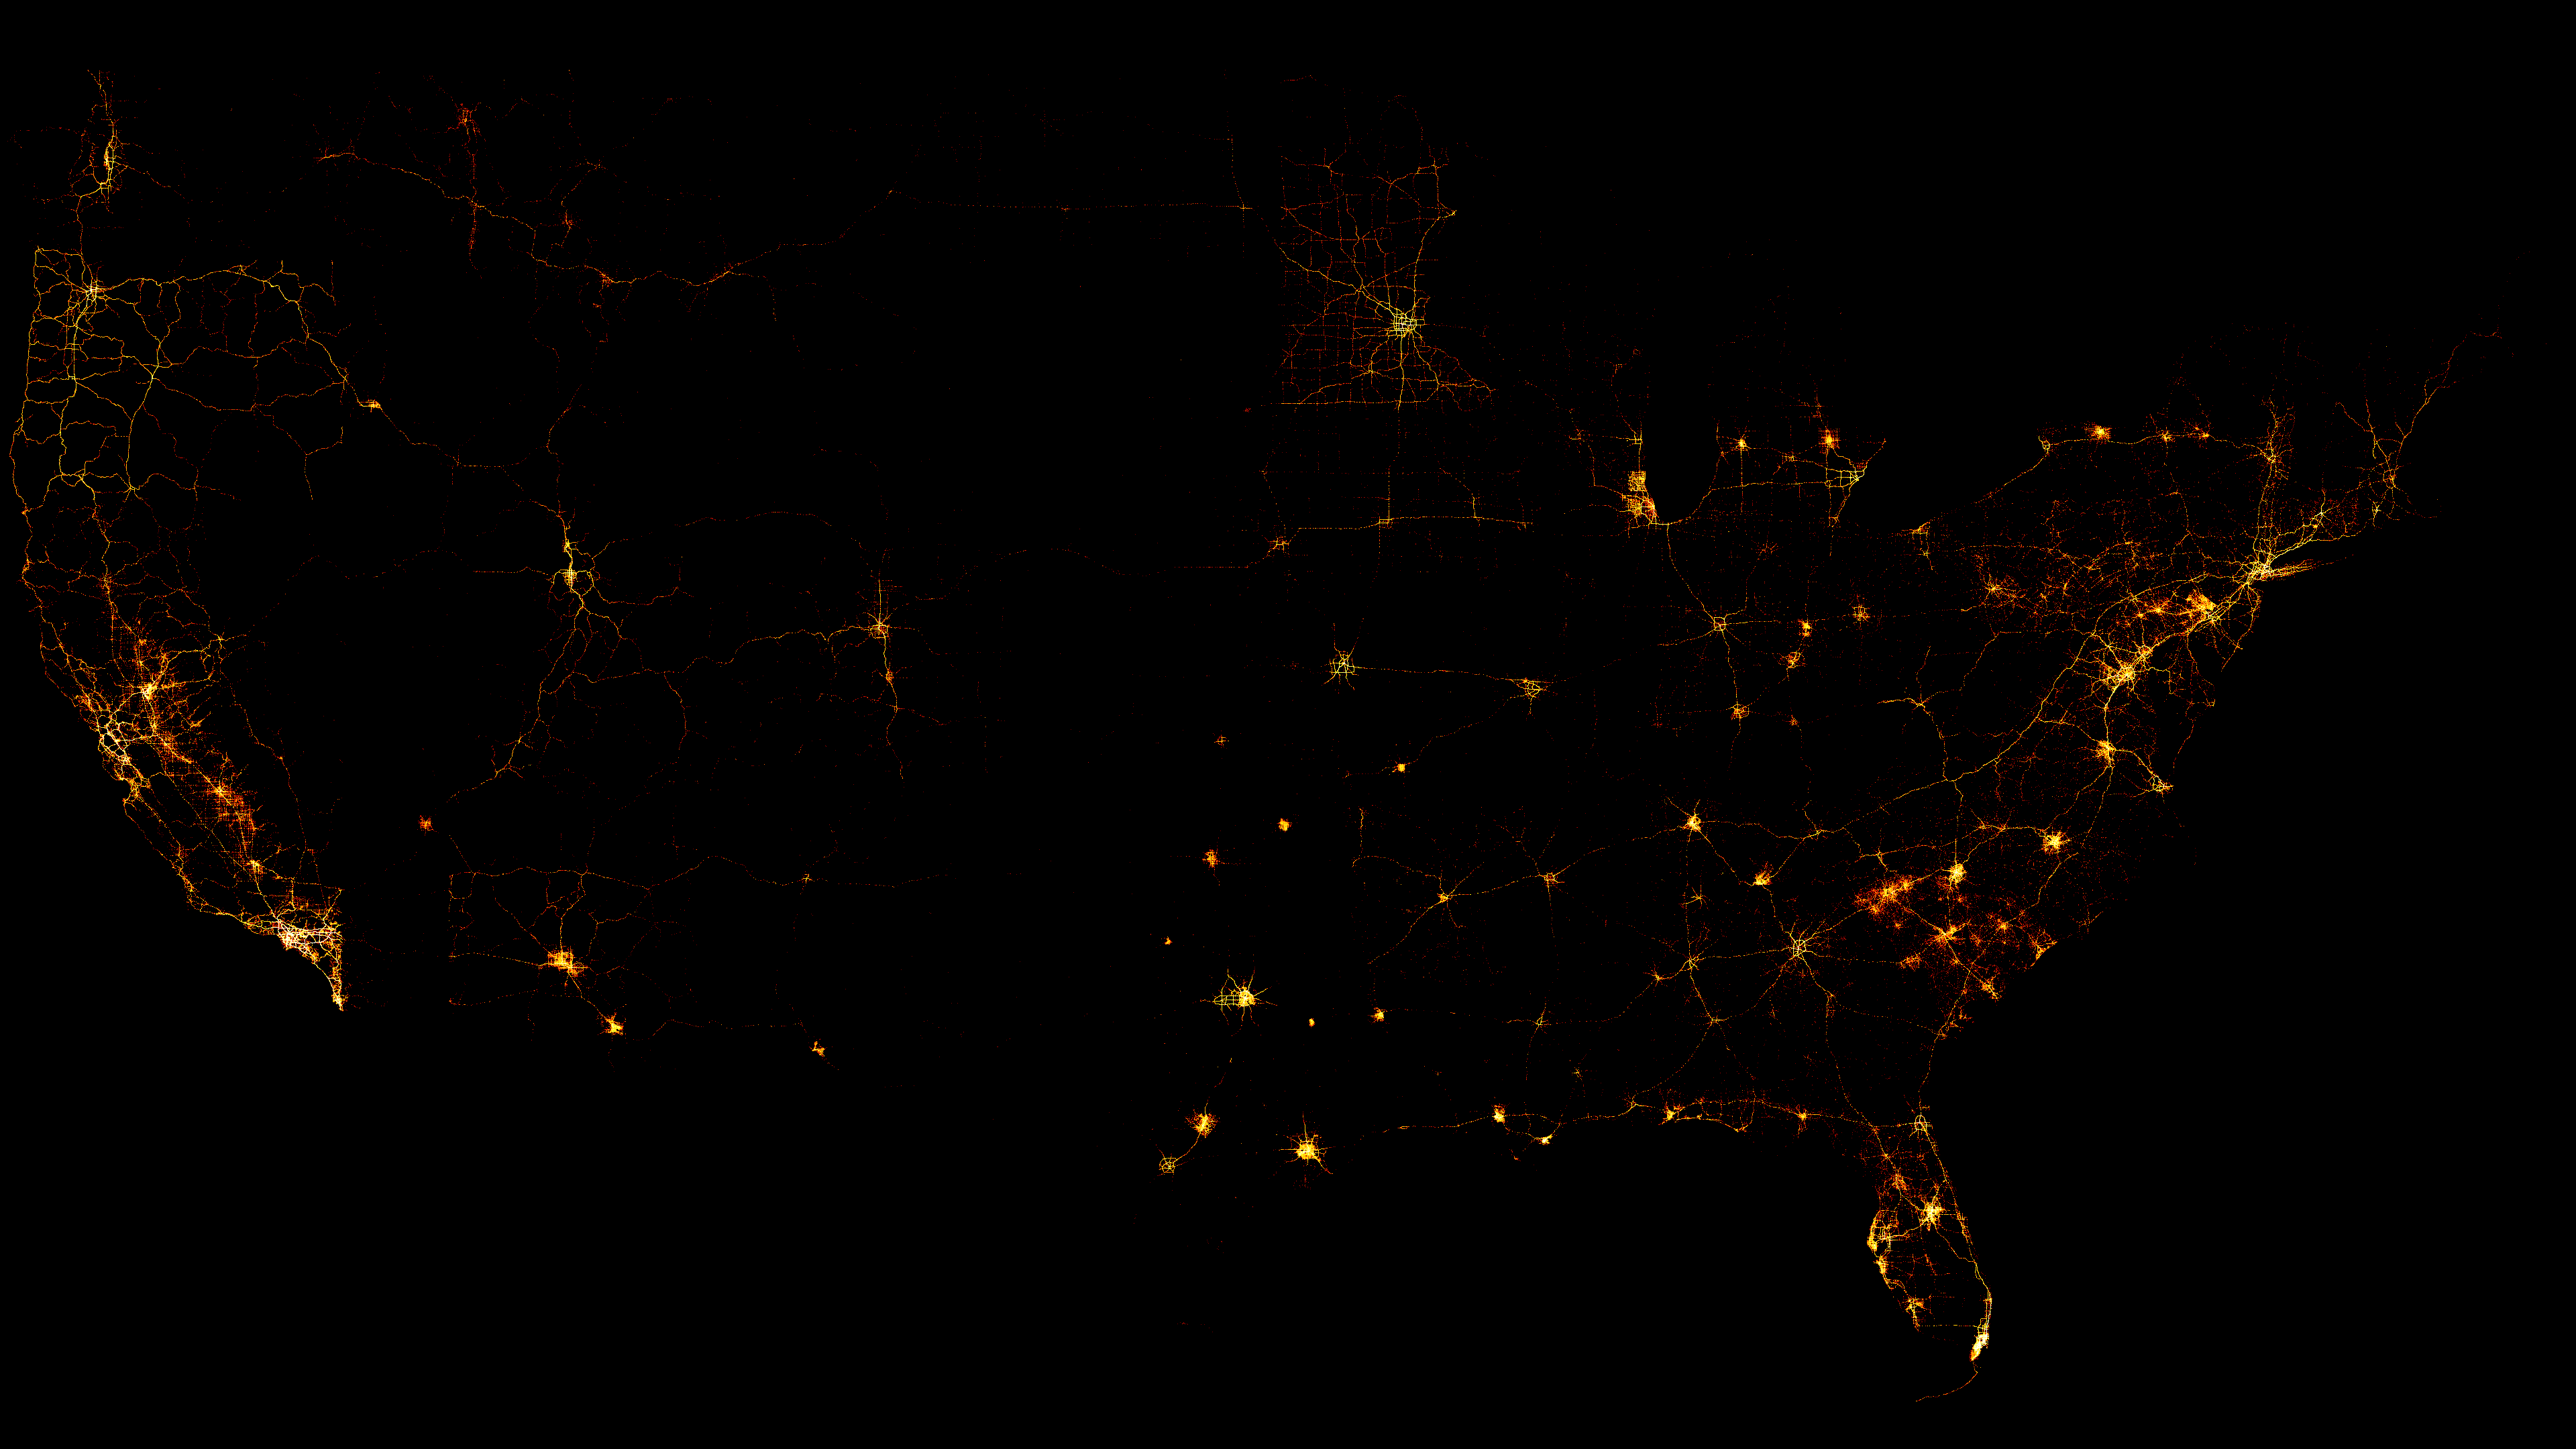

In [44]:
# Rendering and exporting the heatmap into 4k image and render
render_heatmap(dataset=map_total_accidents, x_range='Easting', y_range='Northing', location=USA, file_name="US Accidents Heatmap")

> As seen above, a pixel represents an accident and we can see that the east side of the US alone is scattered with points and specifically the state of California. We can support this statement as we plotted above at the '4.2a Choropleth Map' section, we can say that California has the most accidents accumulated from 2016 to 2021. If we look closer, we can observe that majority of these accidents are in cities or largely condensed areas that are urbanized as we can see in the heatmap above.

### 4.3a Top 5 States and Their Heatmaps

In [45]:
# Specific imports
import bokeh.sampledata
#bokeh.sampledata.download()
from bokeh.sampledata.us_cities import data as us_cities

In [46]:
# Geting the top 5 cities first and thier 

us_accidents_top5_states = us_states_total.copy()
us_accidents_top5_states = get_n_rows_sorted(dataset=us_accidents_top5_states, n_rows=5, column='Total_Accidents')
us_accidents_top5_states.head()

index        name        region  \
46    CA  California     Southwest   
33    FL     Florida     Southeast   
48    TX       Texas     Southwest   
43    OR      Oregon     Northwest   
13    VA    Virginia  Mid-Atlantic   

                                                 lats  \
46  [37.77205, 37.77078, 37.76913, 37.76387, 37.75...   
33  [24.72148, 24.72333, 24.72623, 24.72628, 24.70...   
48  [33.56679, 33.56763, 33.55209, 33.57438, 33.59...   
43  [46.29443, 46.29684, 46.2584, 46.14706, 46.145...   
13  [38.90237, 38.90084, 38.8951, 38.88678, 38.880...   

                                                 lons State  Total_Accidents  
46  [-123.00111, -122.99754, -122.99509, -122.9874...    CA           795868  
33  [-82.88318, -82.87484, -82.86562, -82.80018, -...    FL           401388  
48  [-94.26958, -94.26926, -94.23197, -94.19515, -...    TX           149037  
43  [-124.03622, -124.0356, -123.55518, -123.37257...    OR           126341  
13  [-77.07827, -77.06992, -77.06611, -77.06283, -...    VA           113535

In [47]:
# Helper function for finding the state boundaries and converting them into
# the web mercator format

def get_per_state_accidents(dataset, state_id):

    return dataset.loc[dataset['State'] == state_id] 

In [48]:
# Getting the boundaries of the cities

# STATE ID
# CA: California
# FL: Florida
# TX: Texas
# OR: Oregon
# VA: Virginia

us_states_heatmap = us_accidents_total.copy()
us_states_heatmap = us_states_heatmap[['State', 'Easting', 'Northing']]

# Accident coordinates of the top 5 statess

CALIFORNIA = get_per_state_accidents(us_states_heatmap, state_id='CA')
FLORIDA    = get_per_state_accidents(us_states_heatmap, state_id='FL')
TEXAS      = get_per_state_accidents(us_states_heatmap, state_id='TX')
OREGON     = get_per_state_accidents(us_states_heatmap, state_id='OR')
VIRGINIA   = get_per_state_accidents(us_states_heatmap, state_id='VA')

In [49]:
# Create the heatmaps

california_heatmap = render_heatmap(dataset=CALIFORNIA, x_range='Easting', y_range='Northing', file_name="California Heatmap")
florida_heatmap    = render_heatmap(dataset=FLORIDA, x_range='Easting', y_range='Northing', file_name="Florida Heatmap")
texas_heatmap      = render_heatmap(dataset=TEXAS, x_range='Easting', y_range='Northing', file_name="Texas Heatmap")
oregon_heatmap     = render_heatmap(dataset=OREGON, x_range='Easting', y_range='Northing', file_name="Oregon Heatmap")
virginia_heatmap   = render_heatmap(dataset=VIRGINIA, x_range='Easting', y_range='Northing', file_name="Virginia Heatmap")

#### California Heatmap

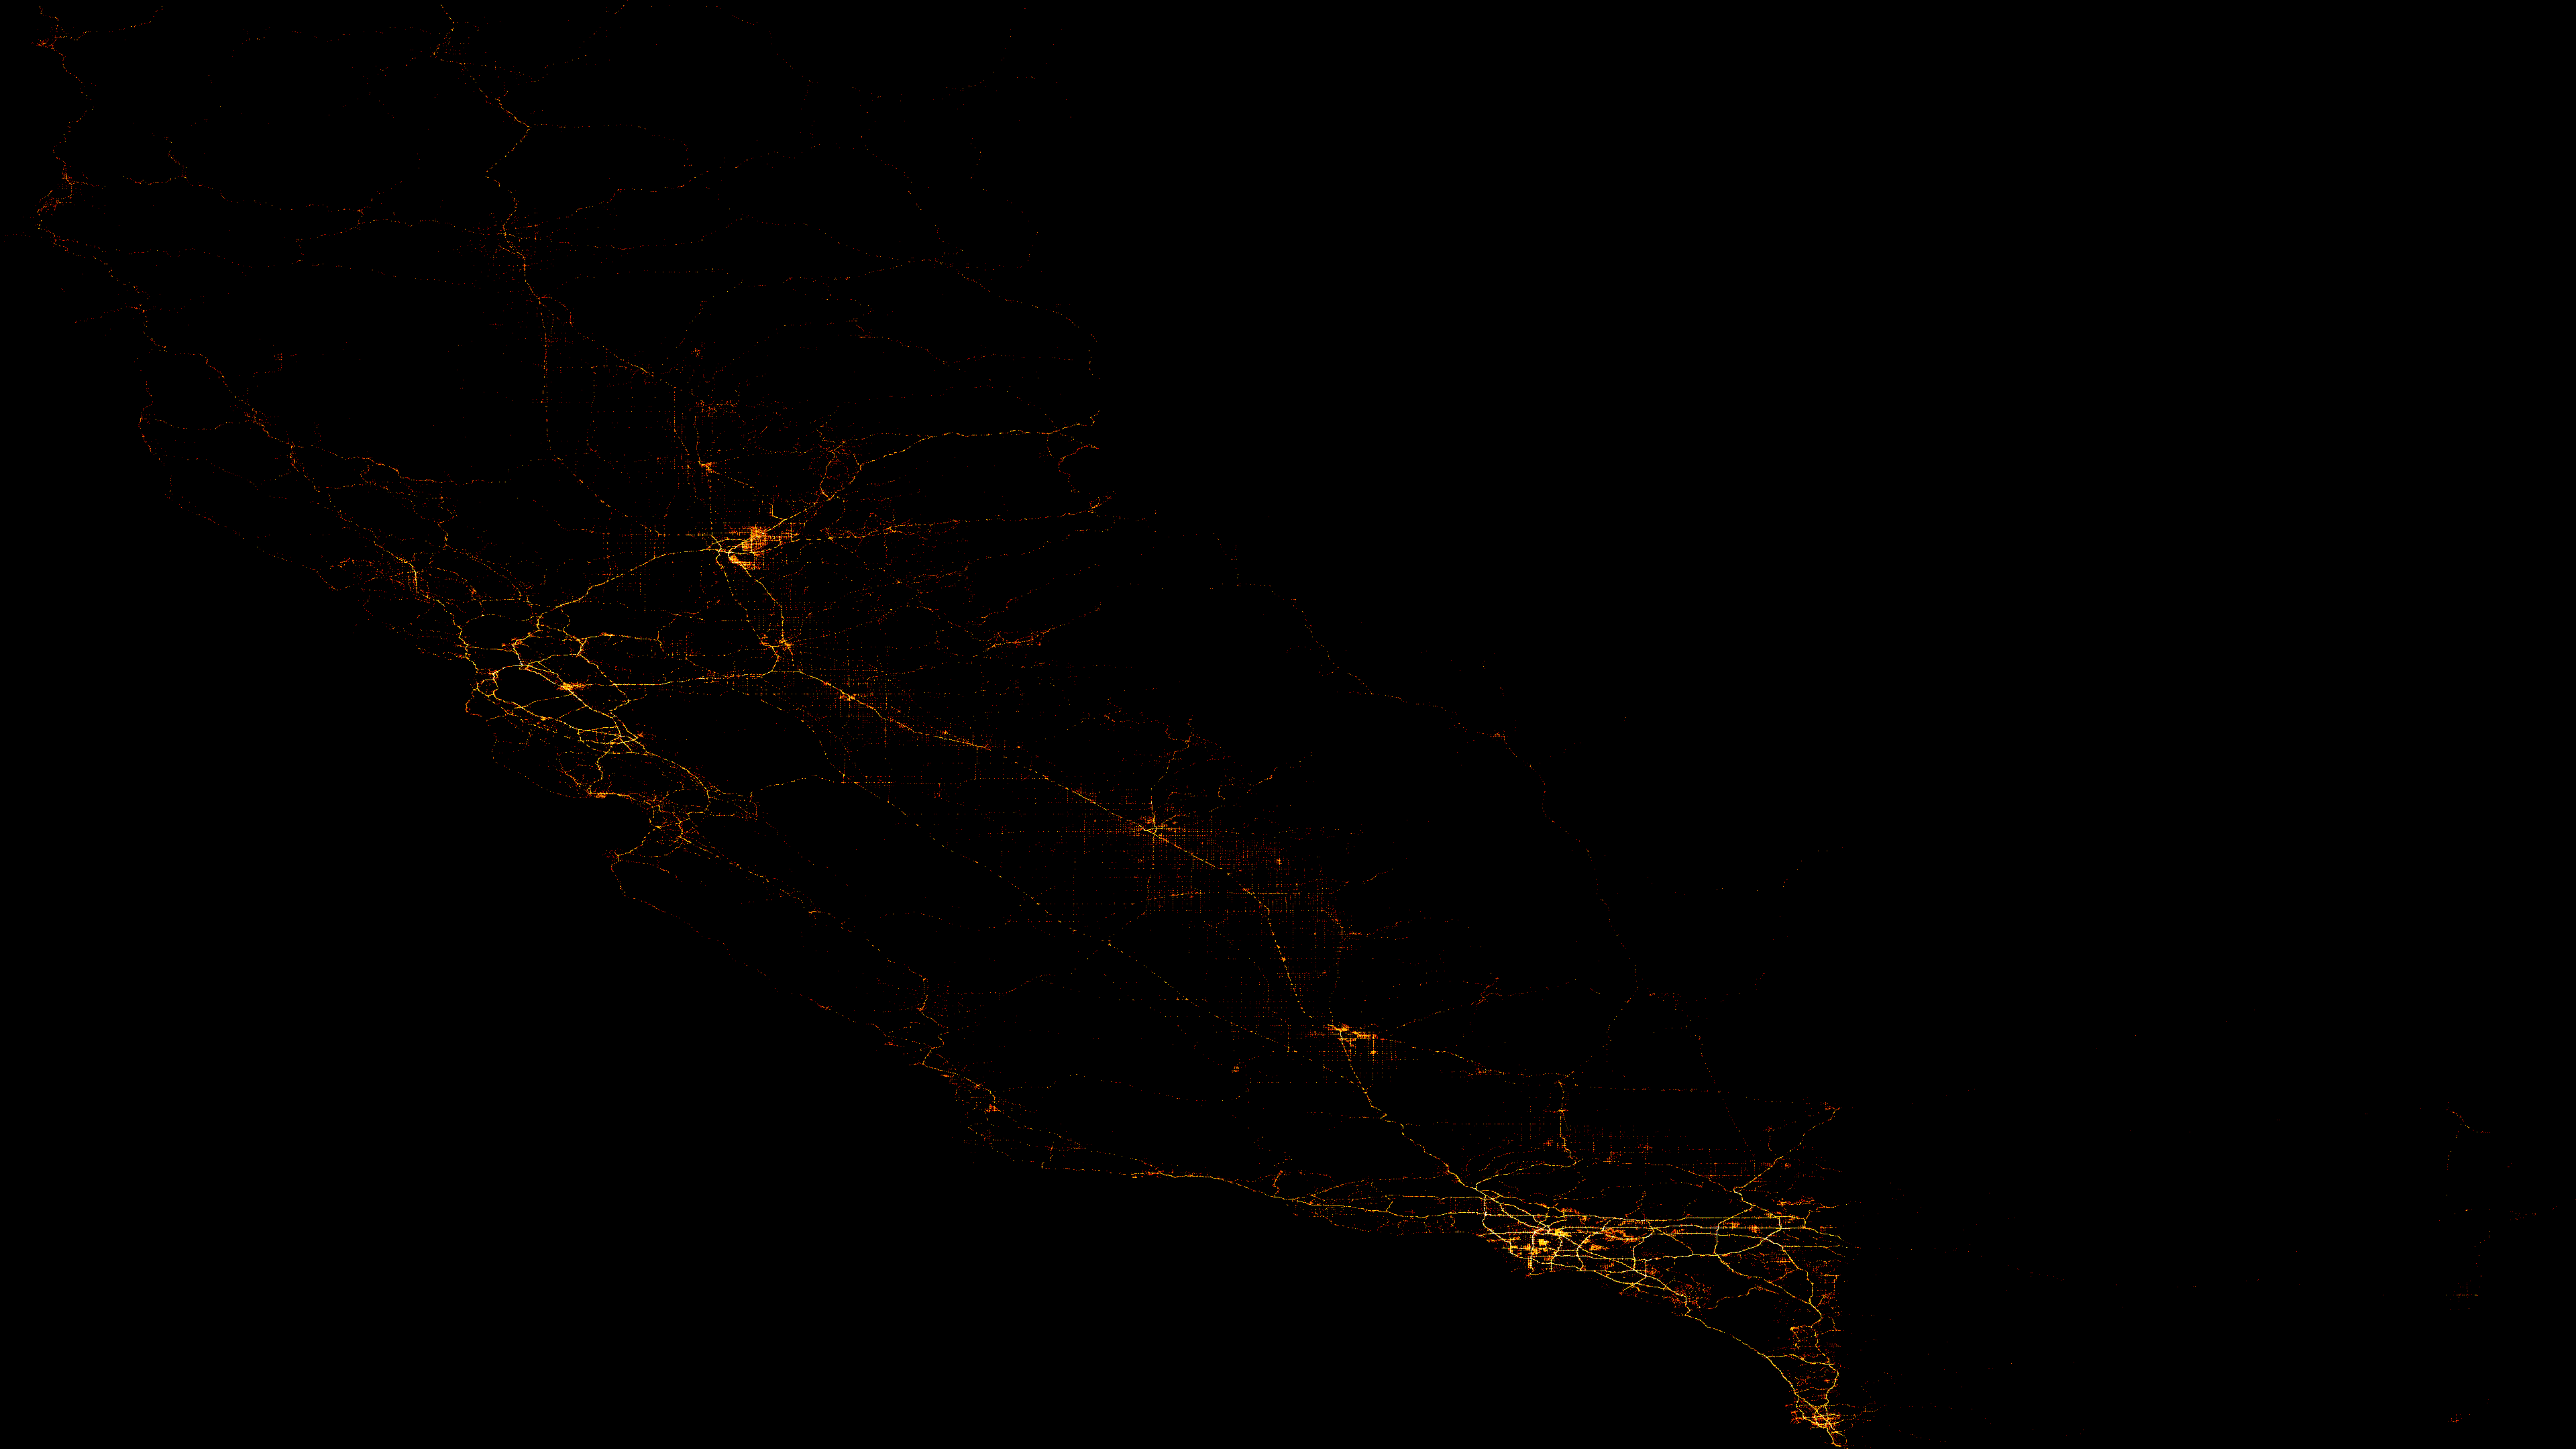

In [50]:
california_heatmap

> Looking at this heatmap, we can definitely say that California has the most accidents from 2016 to 2021. As stated from *(“‘True Crime: On the Run’ Gives an Inside Look at Southern California’s High-speed Police Chases,” 2022)* of ABC news, California in 2020 alone had 2,200 police pursuits and that was the year when the COVID-19 Pandemic was on the rise. It was also stated that the top reason for all these chases are stealing vehicles or car jacking which explains why California is the state with the most accidents.

**Source:** “True Crime: On the Run” gives an inside look at Southern California’s high-speed police chases. (2022, September 3). ABC7 Los Angeles. https://abc7.com/true-crime-on-the-run-police-chases-los-angeles-southern-california-how-many-in/12181278/

#### Florida Heatmap

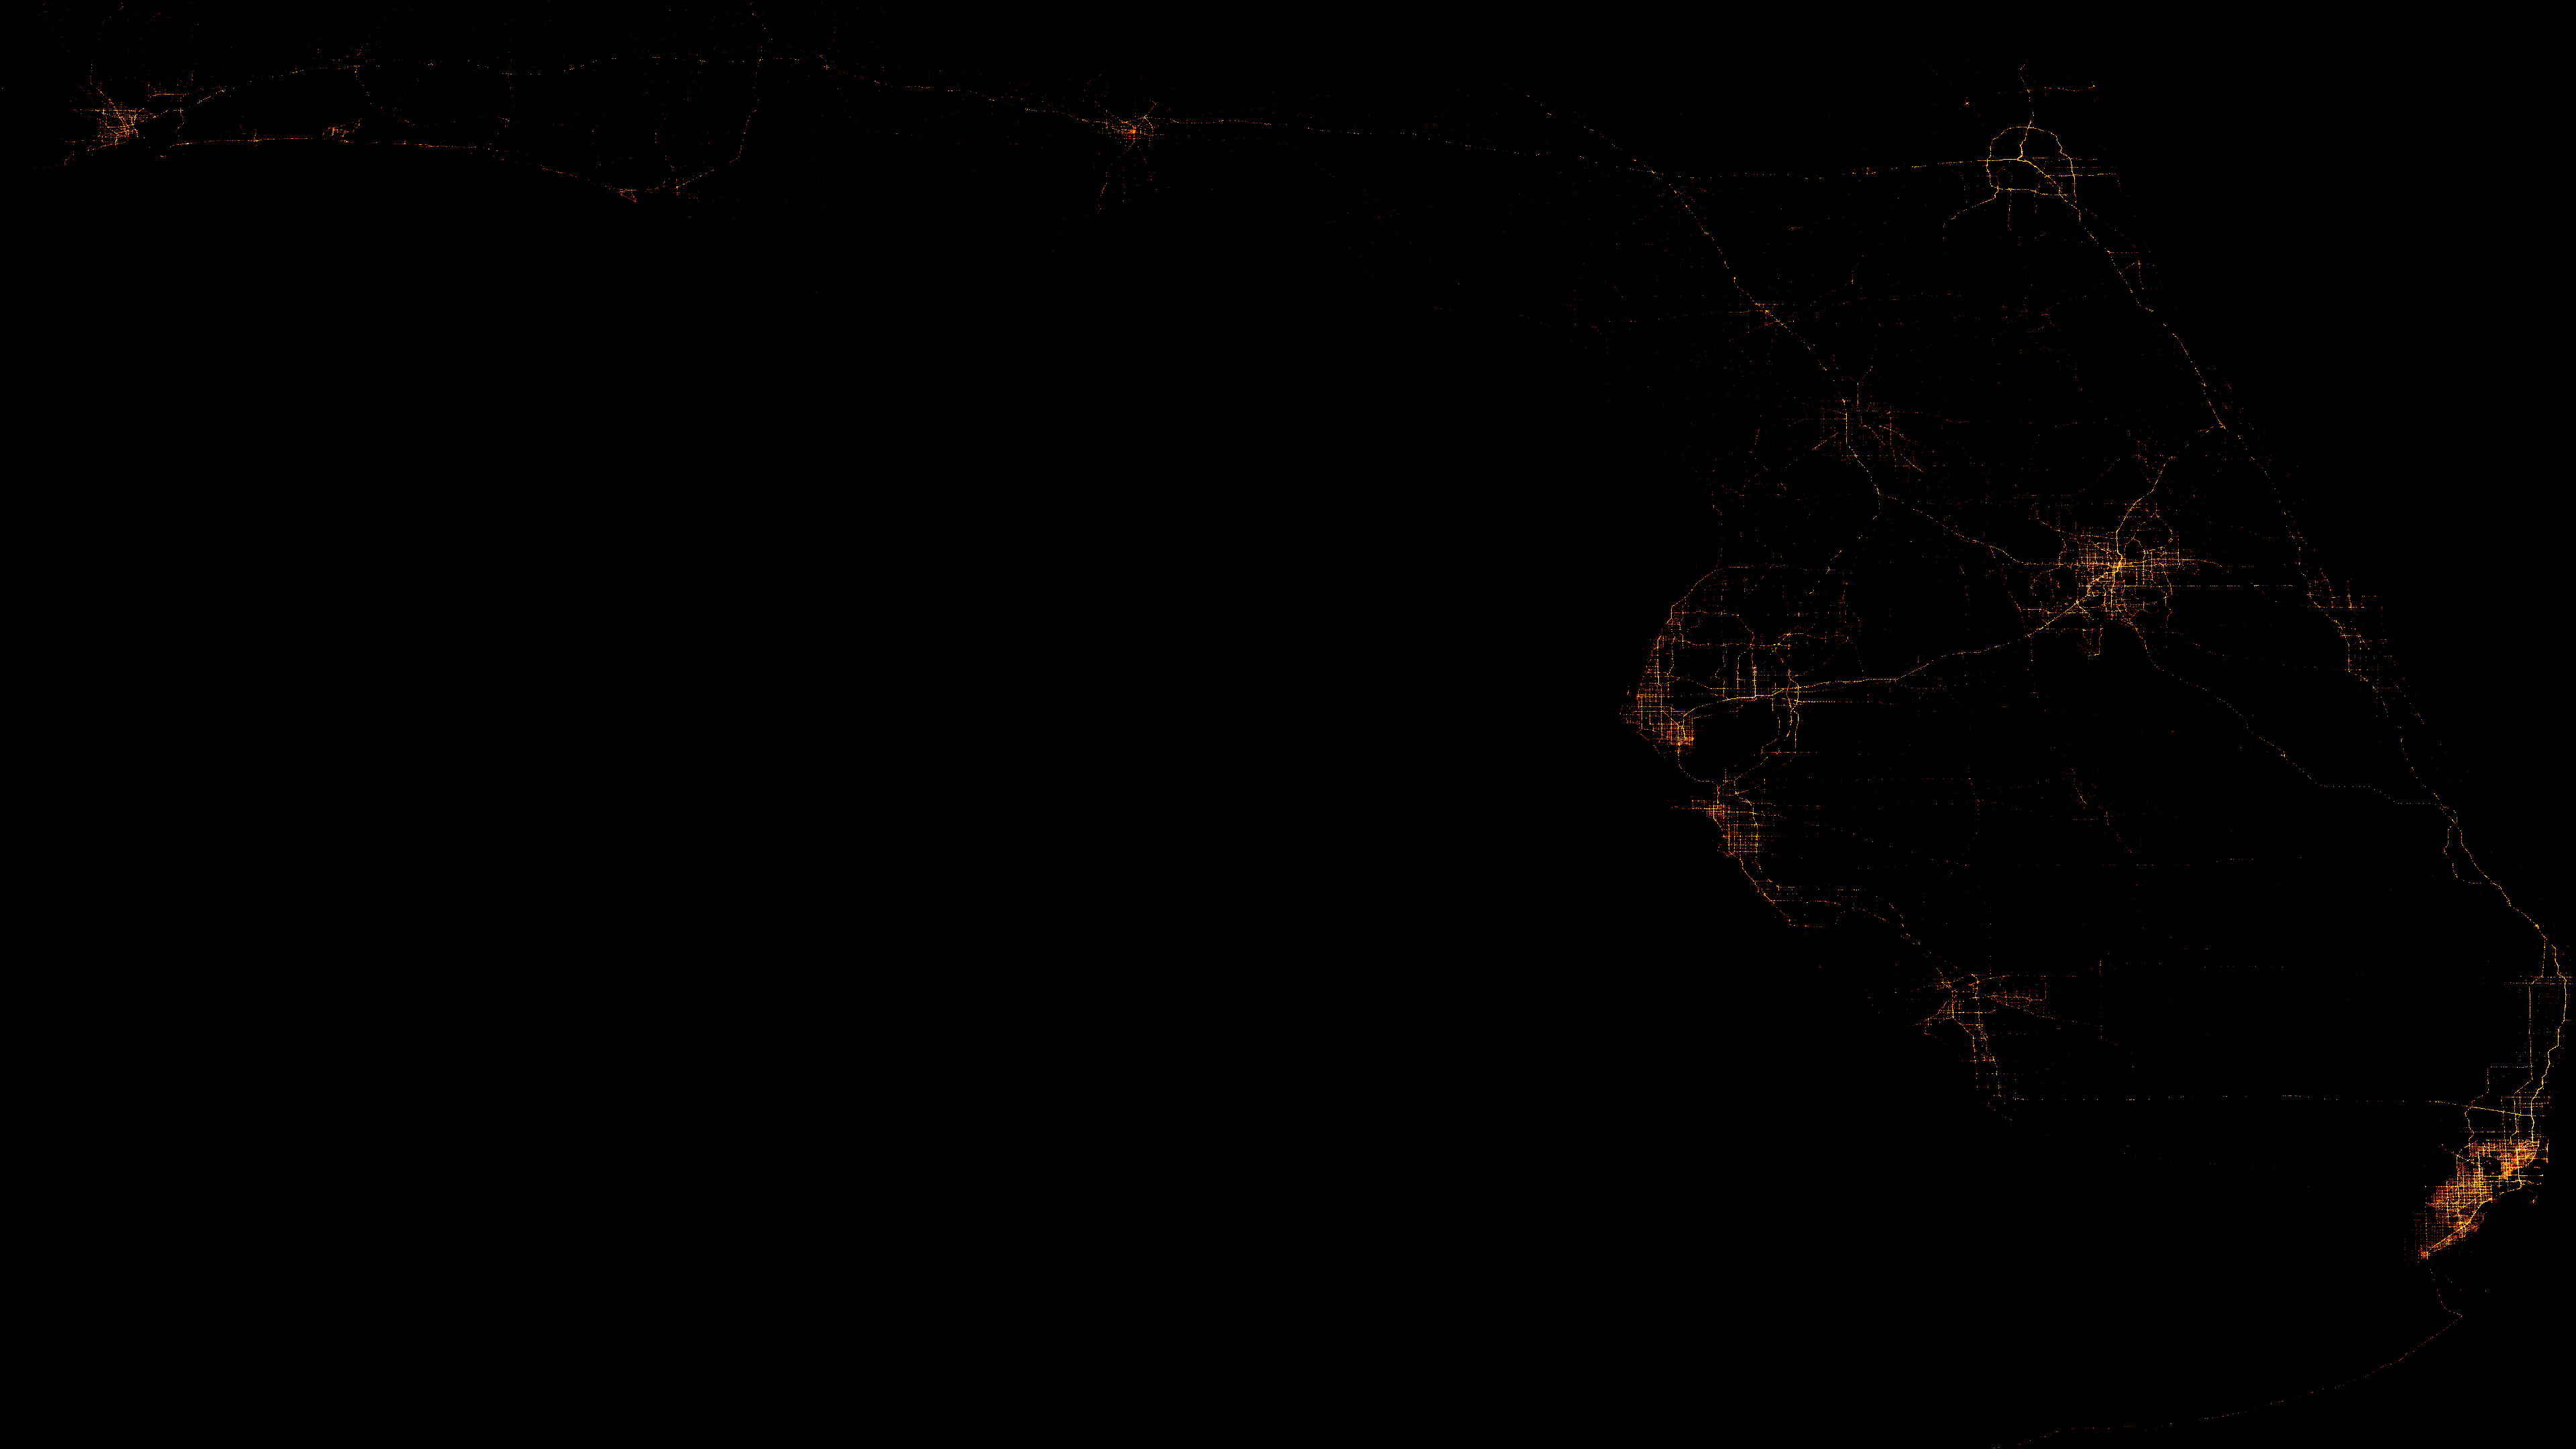

In [51]:
florida_heatmap

> As we look at the heatmap above, the accidents are scattered and dense than California but it is the second state with the most accidents as according to this article *Hit-And-Run Crashes On Florida Roads Average Over 103,000 Per Year; Drivers Urged To Stay At The Scene* (Chern, 2023) , it stated that in 2021, there were 109,624 Hit-And-Run crashes. And that was the year when America started to loosen up their restrictions even the Pandemic is making itself more contagious and dangerous. 

**Source**: Chern, A. (2023, February 10). Hit-And-Run Crashes On Florida Roads Average Over 103,000 Per Year; Drivers Urged To Stay At The Scene. Florida Department of Highway Safety and Motor Vehicles. https://www.flhsmv.gov/2023/02/01/hit-and-run-crashes-on-florida-roads-average-over-103000-per-year-drivers-urged-to-stay-at-the-scene/

#### Texas Heatmap

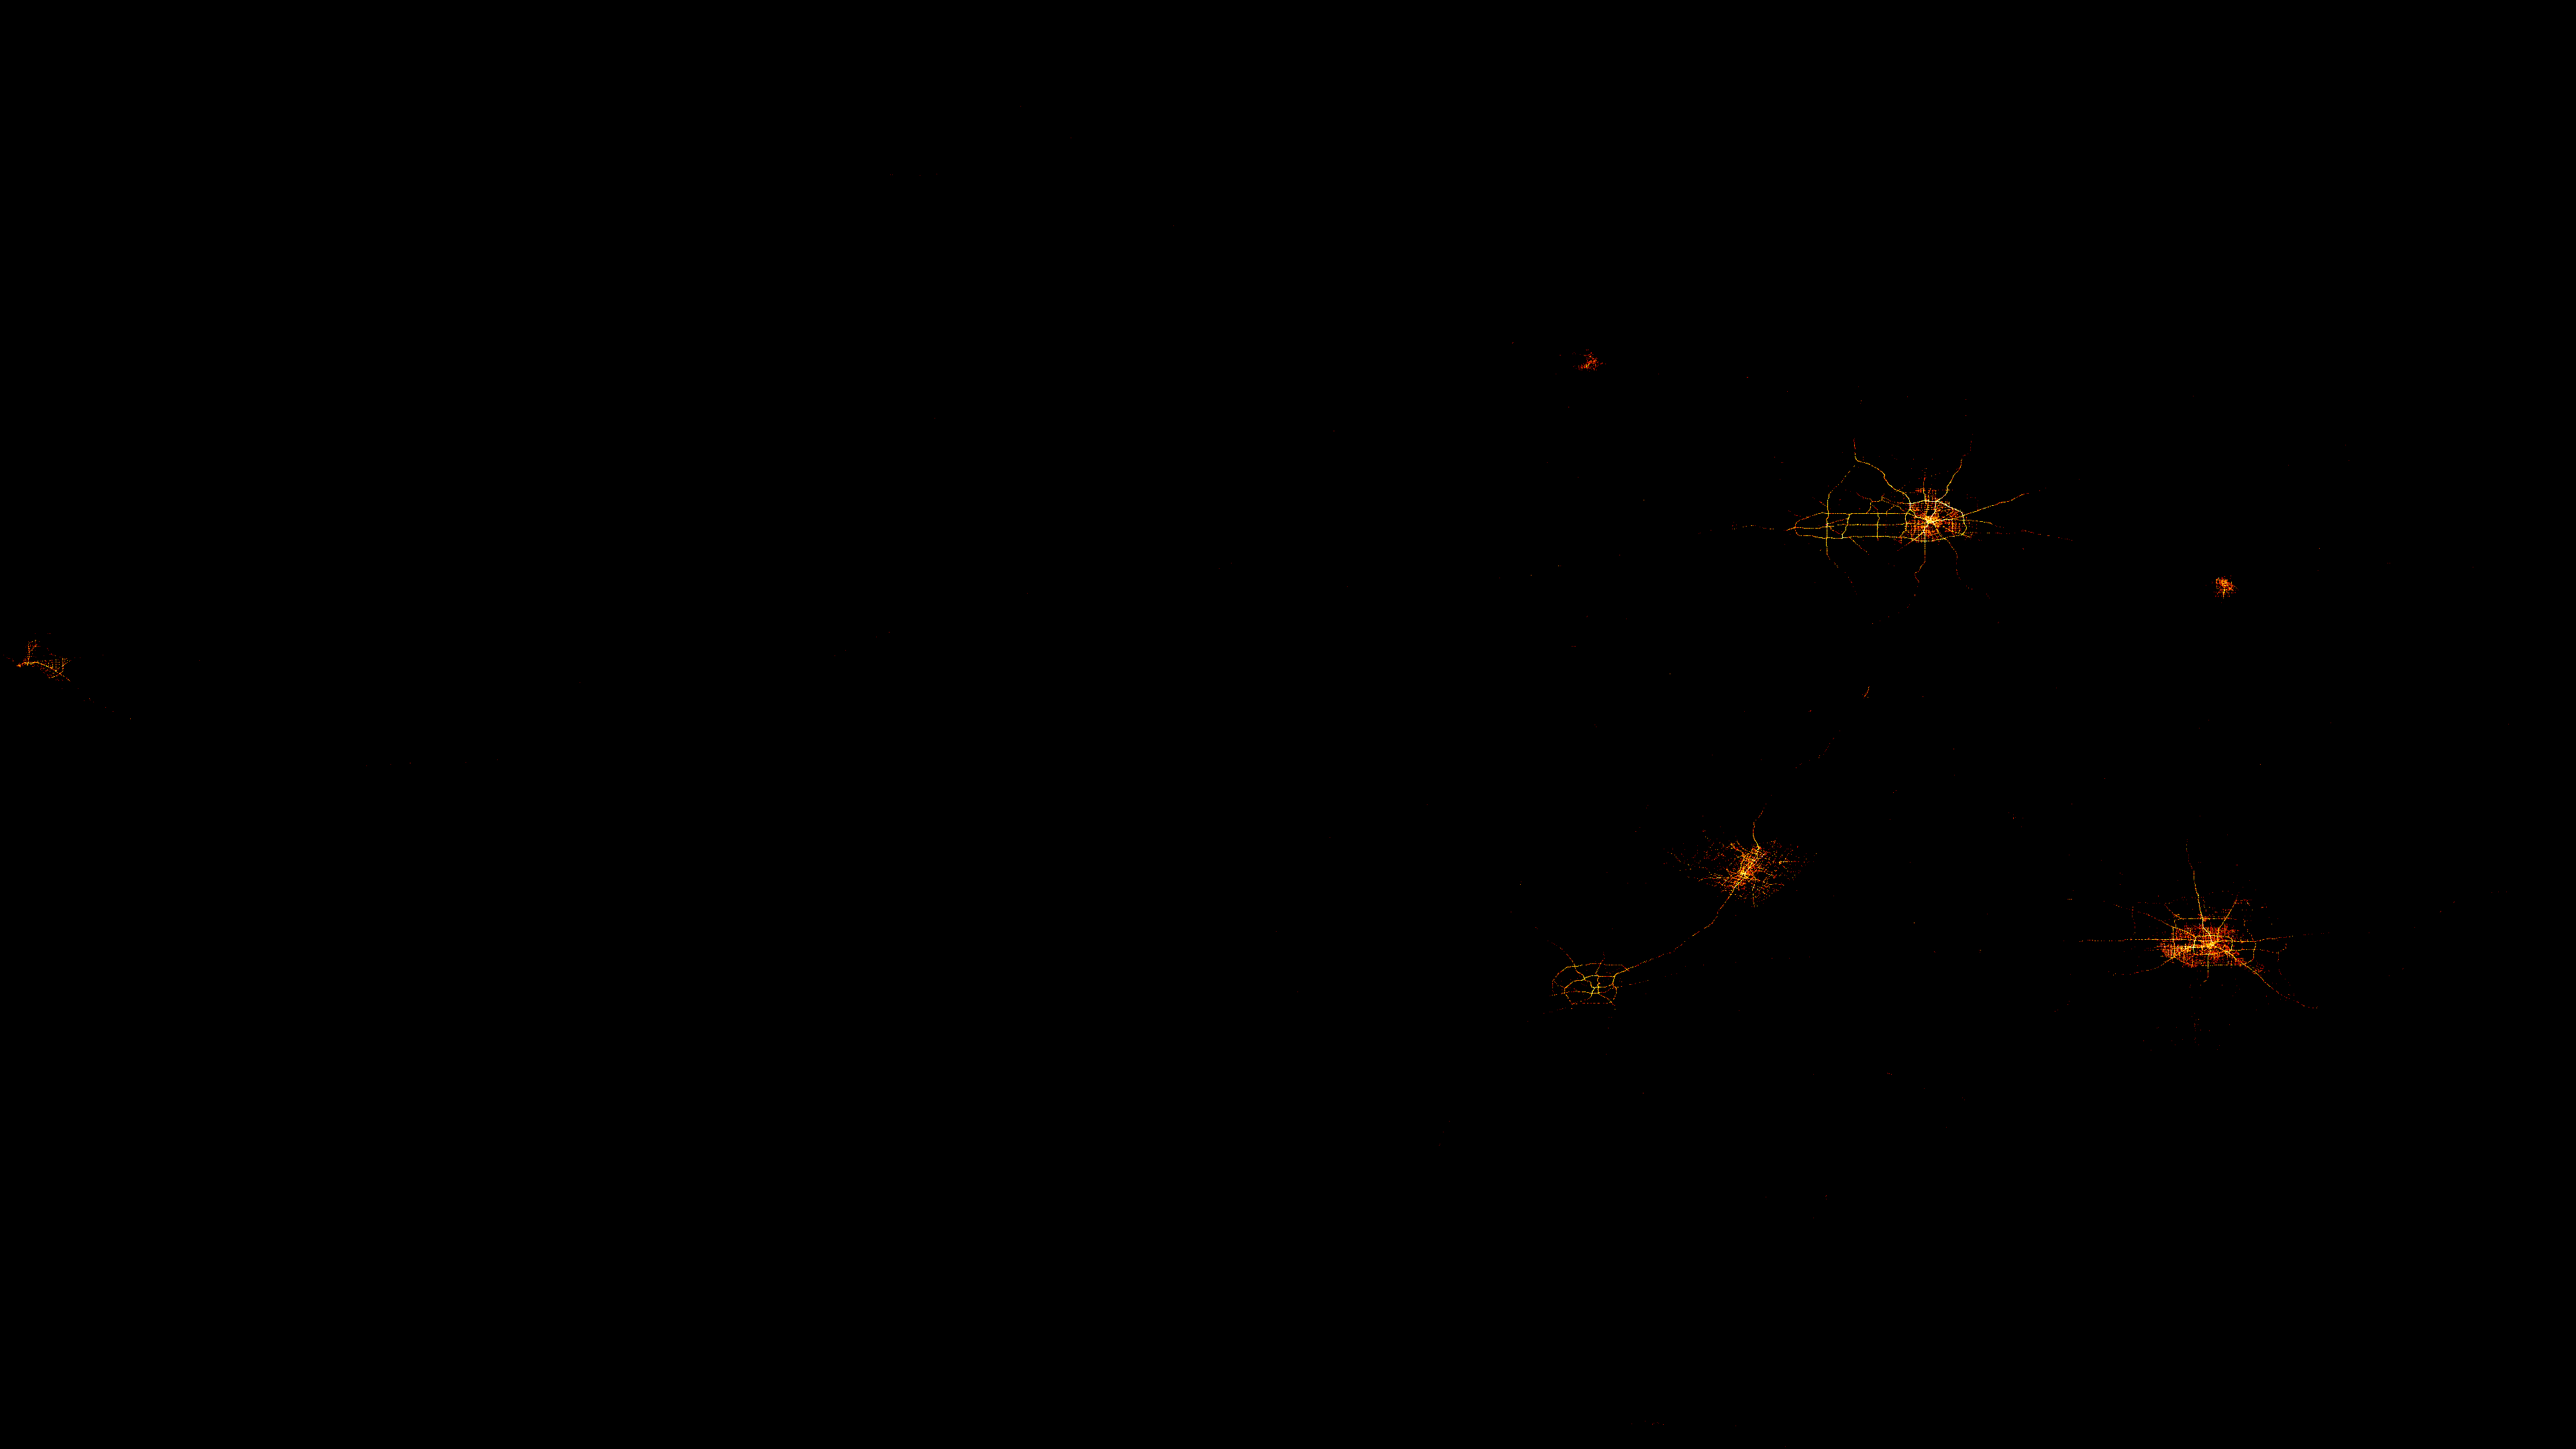

In [52]:
texas_heatmap

> Texas is the second largest state in the US and geographically speaking, it is the farm capital of US. And due to that factor, cities are more apart and not condensed as the land area is huge. We can see that here that most of the hot spots are from the major cities such as Houston, Austin, Dallas, And San Antonio. And since most of the land they have are farms, highways are much less and are only in the cities which means the crash rate they have seven times less than California

**Source**: Statista. (2022, June 21). Top U.S. states based on number of farms 2021. https://www.statista.com/statistics/196114/top-10-us-states-by-number-of-farms/

#### Oregon Heatmap

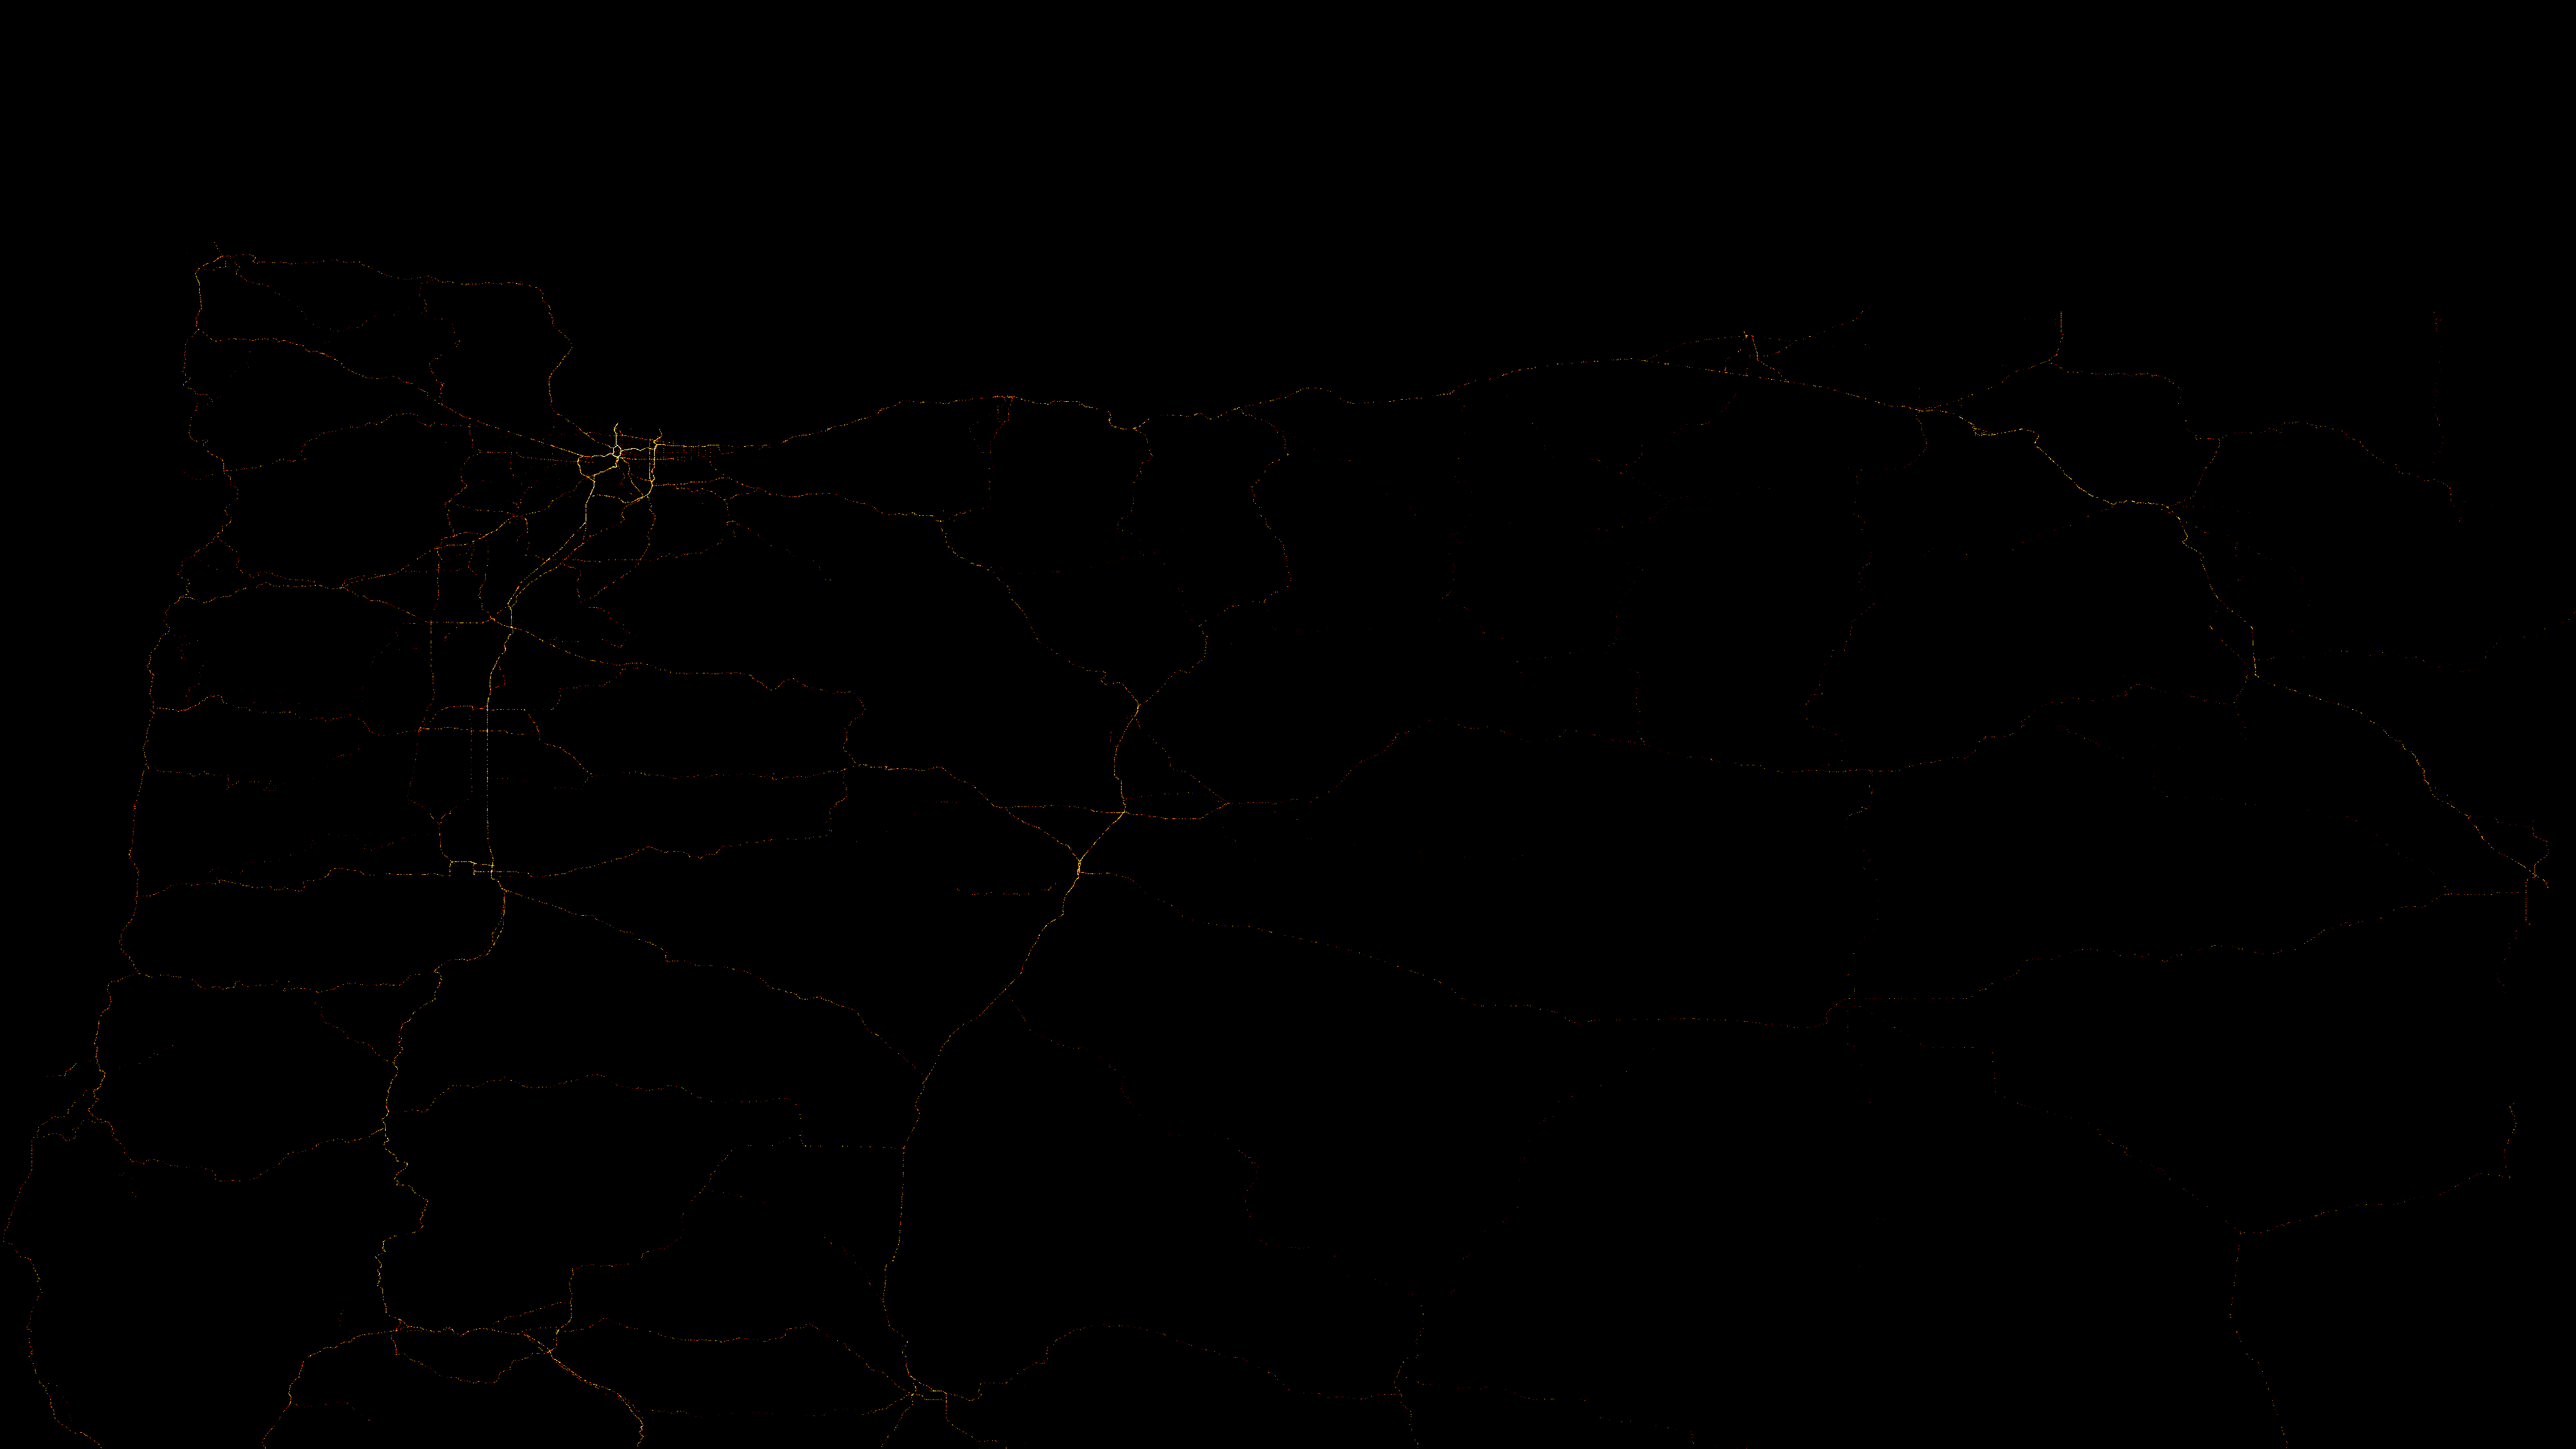

In [53]:
oregon_heatmap

> Oregon is state that lives by the mountains and due to that, the accidents we can see in the heatmap are more on the state roads rather than city highways or urban streets. One hot spot we can see is on the upper side and that is the largest City of Oregon which is Portland. But despite being a big city most of the accidents are still on the roads leading up or down to the mountains due to factors such as speeding up in high sections, low light in the roads as most of it are in the less urban areas, and environmental reasons.

#### Virginia Heatmap

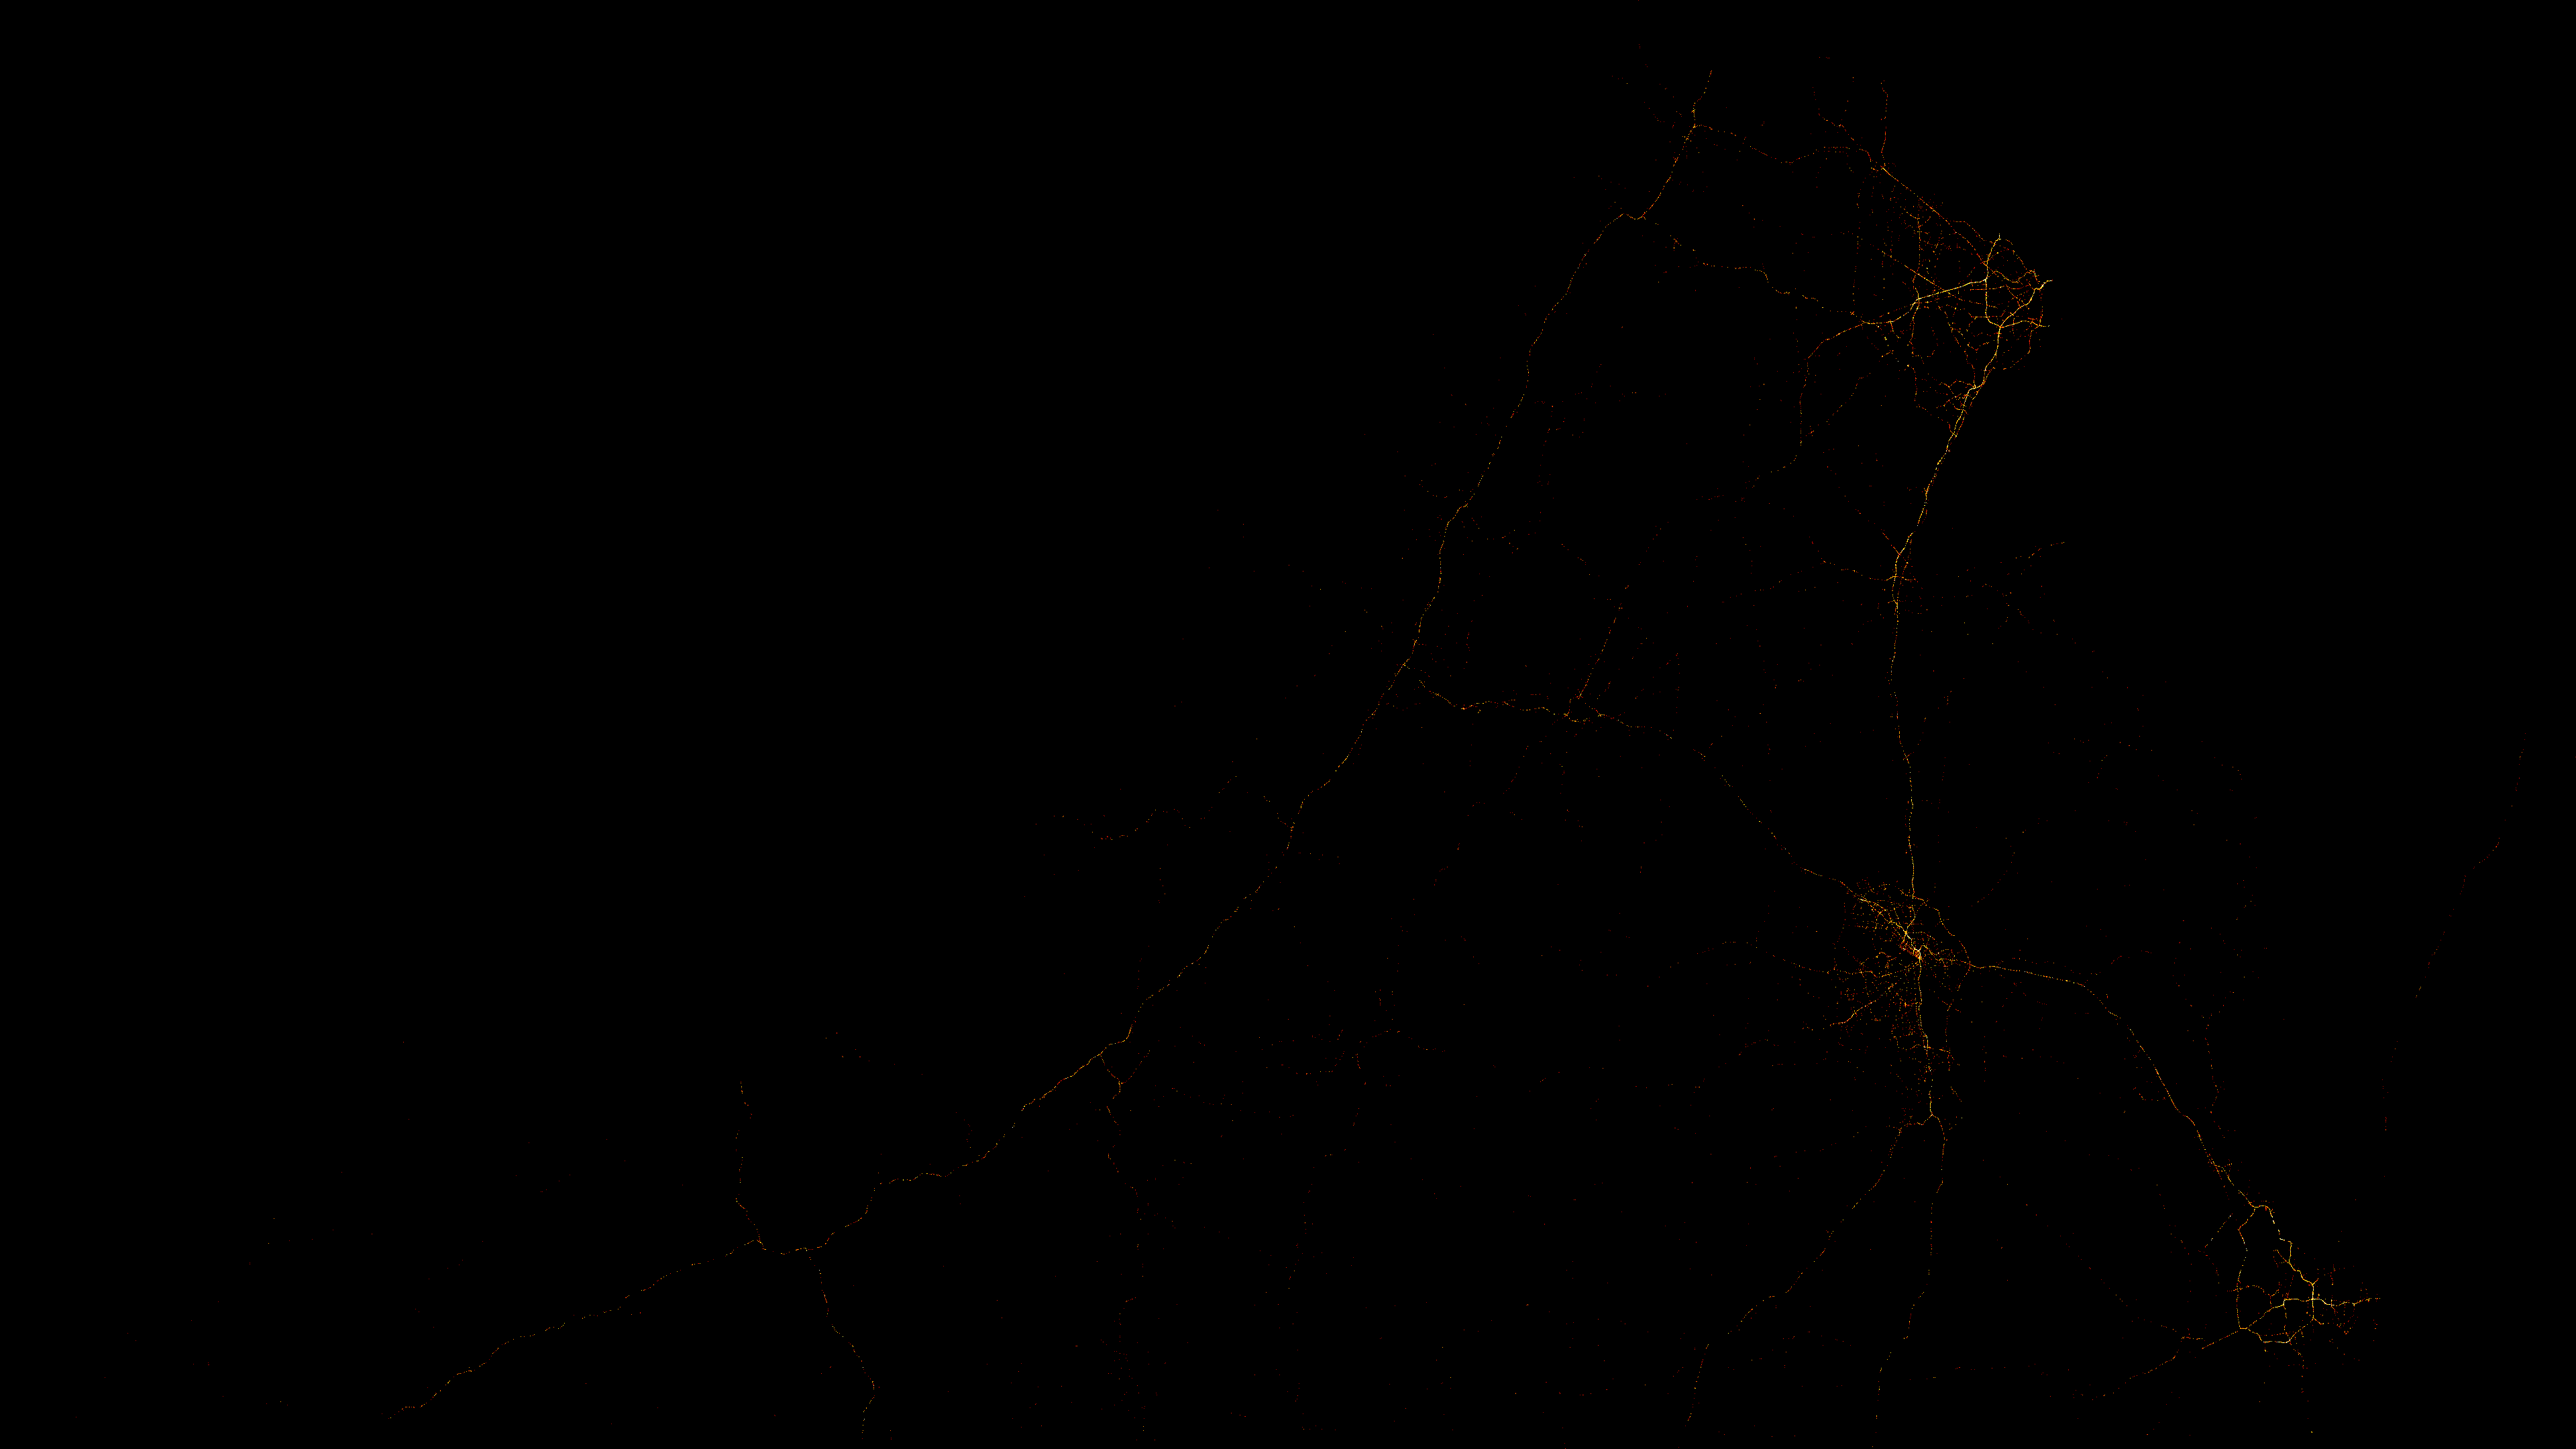

In [54]:
virginia_heatmap

> Virginia is one of those states like Texas that majority of the land is nature and urbanized sections present are not much. If we observe the heat map above, the hot spots are in the big cities such as the Richmond, the capital of Virginia. but we can also see hot spots above and below Richmond these cities are Washington DC that is miles away from the border of Virginia and Norfolk, located in the southeastern side of Virginia.

## 4.3 Correlational Analytics

### 4.3a Correlations The Variables 

In [139]:
#%matplotlib inline

# Getting the correlation of the variables that we are going to analyze
temps_correlation = us_accidents_total[['Severity','Temperature(F)','Visibility(mi)','Wind_Speed(mph)','Precipitation(in)']]
temps_correlation = temps_correlation.corr().round(3)
temps_correlation


Severity  Temperature(F)  Visibility(mi)  Wind_Speed(mph)  \
Severity              1.000          -0.045           0.007            0.048   
Temperature(F)       -0.045           1.000           0.211            0.079   
Visibility(mi)        0.007           0.211           1.000            0.036   
Wind_Speed(mph)       0.048           0.079           0.036            1.000   
Precipitation(in)     0.014          -0.004          -0.122            0.027   

                   Precipitation(in)  
Severity                       0.014  
Temperature(F)                -0.004  
Visibility(mi)                -0.122  
Wind_Speed(mph)                0.027  
Precipitation(in)              1.000

Text(0.5, 1.0, 'Correlations Between The Factors')

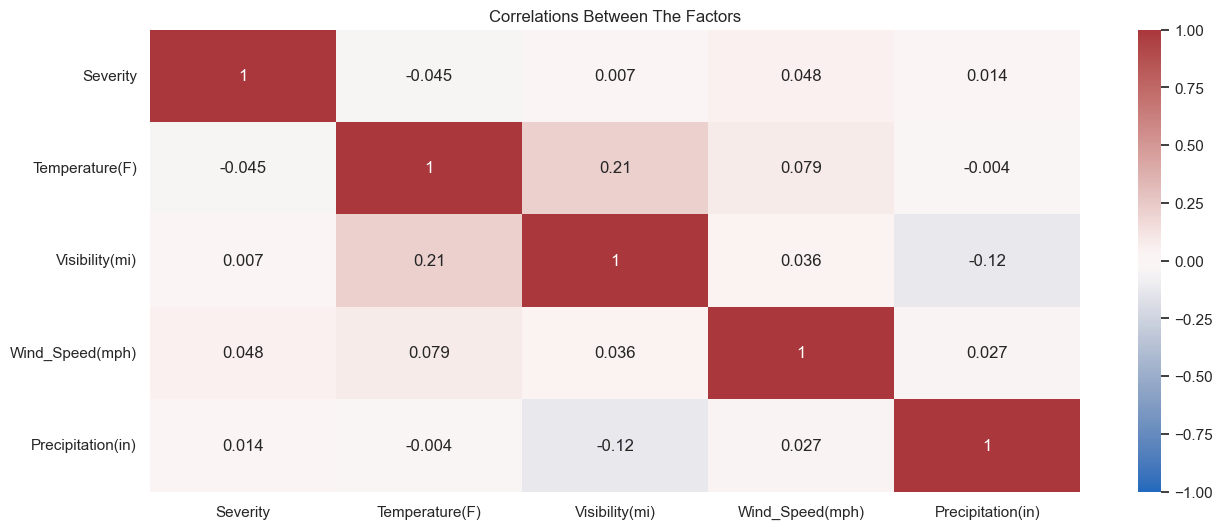

In [140]:
# Plotting the correlation matrix (I am going to use a correlation matrix so that I can see the correlation between more than 1 variable)

f, ax = plt.subplots(figsize=(15, 6))

s = sns.heatmap(temps_correlation, annot=True, vmax=1, vmin=-1, center=0, cmap='vlag')
plt.title("Correlations Between The Factors")

### Some observations that we can see: <br>

* Severity has little to nothing when it comes to correlation with the variables.
* Interestingly visiblity and temperature has a slight positive correlation
* Severity has a slight negative correlation with visibility
* Visibility's correlation is equl with severity's correlation with visibility

### What can we conclude?

We can say that external factors of the accident such as the temperature, visiblity, wind speed, and precipitation, has no correlation at all with the severity level of the accident. This means these external factors has almost to no connection with the level of severity. So we may see a fast wind speed but its severity is low. So, to conclude severity is not connected with the external factors but we can make a hypthosis that severity may be hugely affected by factors such as speed of the vehicle, was it a huge accident, and, the geographical location.

## 5.1 Summary

* California is the state with the most accidents with it being 65.90% greater from the second state .
* Most of the accidents occured on a 'fair' weather condition.
* From 2016 to 2021, the year 2020 had a huge drop due to the pandemic Covid-19 but then it soon spiked in 2021 as US started to loosen restrictions.
* We can assert that the temperature of 76 farenheit and the weather condition 'fair' is directy connected as both of them has the most accidents that occured to.
* In most states that have many cities, accidents are more frequent in the urban areas such as streets, highways, and, avenues.
* Severity has no correlation with the external factors of the accident that are temperature, visiblity, wind speed, and, precipitation.

## 6.1 Biliography

* *Chern, A. (2023, February 10). Hit-And-Run Crashes On Florida Roads Average Over 103,000 Per Year; Drivers Urged To Stay At The Scene. Florida Department of Highway Safety and Motor Vehicles. https://www.flhsmv.gov/2023/02/01/hit-and-run-crashes-on-florida-roads-average-over-103000-per-year-drivers-urged-to-stay-at-the-scene/*
* *Statista. (2022, June 21). Top U.S. states based on number of farms 2021. https://www.statista.com/statistics/196114/top-10-us-states-by-number-of-farms/*
* *“True Crime: On the Run” gives an inside look at Southern California’s high-speed police chases. (2022, September 3). ABC7 Los Angeles. https://abc7.com/true-crime-on-the-run-police-chases-los-angeles-southern-california-how-many-in/12181278/*
* *N. (2022, August 13). Calculate and Plot a Correlation Matrix in Python and Pandas. Datagy. https://datagy.io/python-correlation-matrix/*
* *Developers, P. (n.d.). Census - Data Shader Example. https://datashader.org/topics/index.html. https://examples.pyviz.org/census/census.html*
* *Solanki, S. (2021, October 10). Geoviews - Choropleth Maps using Bokeh and Matplotlib [Python]. https://coderzcolumn.com/tutorials/data-science/geoviews-choropleth-maps*